# Airbnb Pricing Prediction
**James Gearheart**<br>
**Danny Zhuang**<br>
**Bob Saludo**<br>
**Ryan Wallace**<br><br>
**Harvard University**<br>
**Fall 2016**<br>
**TF: Christine Hwang**<br>

## Summary of Work and Insights from Pre-Modelling Phases
### Data Overview
#### Formatting
The data was retrieved from the data.beta.nyc website by zip file download. The only complication in storing the data is that since the file sizes are over 100MB, the files can not be stored on GitHub. If it proves necessary, GitHub Large File Storage may provide a solution for this issue.

In each of the three datasets, (listings, calendar, and reviews), the data are well formatted overall in CSV format with one record (listing, listing-date, or review, respectively) per row. Given the varied nature of the data, Pandas is a good choice for initial processing, and each of the three datasets is read into its own Pandas data frame. Manual examination of the data shows that the 'id' field in the listings data set corresponds to the 'listing_id' fields in the reviews and calendar data, so joining on these fields is feasible, as demonstrated in the proof of concept above.

There are occasional formatting irregularities throughout the data that have been fixed. For example, some fields contained excess parentheses or string data types where floats or booleans are more appropriate. The price fields were orignally encoded as strings with dollar sign and comma values. These were converted to floats for use in learning models. 

#### Missing Values
While the datasets are very complete on average, there are a significant number of missing values. In the listings dataset, roughly 30% of all review scores, the vast majority of the square footage values, and low percentages of other listing characteristics are missing. In the calendar dataset, 28% of the listing-dates do not have price information. In the reviews dataset, an insignificant number of comments are missing.

The missing values were handled in various ways to suit the nature of the data. Missing price data is a roadblock because it is inadvisable to attempt to impute missing response variables. Thus, records with missing price data are dropped. For categorical variables, it is imagninable that knowing which listings have descriptors absent is associated with the price (likely in a negative fashion). Therefore, missing categorical values were replaced with a new category 'unspecified'. Missing review values were imputed with the global mean, as the correlation between price and the majority of review metrics is so low that attempting to use regression for imputation would be useless. Likewise, the data are too noisy for KNN to be of use. For other continuous feature variables such as bedrooms, bathrooms, and beds with relatively high correlation with price, missing values were imputed using linear regression. 

After all imputation was finished, the only missing values were those of weekly and monthly prices. These missing values are potential response variables, and will be dealt with on an individual model basis.


#### Size of Data
There are a total of about 27,000 listings in the listings data set, each with 52 features. The calendar dataset contains one entry for each day of the year for each of the approximately 27,000 listings. The reviews dataset contains about 28,000 reviews for about 19,000 distinct listings. 

After cleaning, the majority of the data remains. All of the orignal listings remain in the data; over 70% of the calendar records are useful; and the vast majority of the reviews have complete comments.

### Features and their Distributions
There are three potential response variables in the data, nighly price, weekly price, and mothly price. Since over half of the weekly and monthly price data are not present, it seems reasonable to focus on predicting nightly price. Nightly prices are right-skewed, with a few very high outliers. The majority of the prices are below 300 dollars per night. The price distribution looks approximately lognormal, so a log transformation of the price variable resulting in a normal distribution of prices may play better with regression techniques.

There are over fifty predictors in the listings dataset, both continuous and categorical. Histograms of the continuous variables of interest and lists of the most frequent categorical variables of interest appear above. Interesting factors to note are that the majority of listings have one bedroom and one bathroom, and that reviews are extremely left-skewed.

### Visualize the supply/price of Airbnb homes by location
We notice that in general, the overwhelming majority of rental properties are concentrated in the center of the grid (between 40.6 - 40.9 Latitude, and -73.8 - -74.1 Longitude. Outside of this dense range, we have sparse units in the outskirts of NYC which are predominantly listed under the 'unspecified' category for neighborhood and are own the lower end of the pricing spectrum. 

On the whole, the most expensive rentals are in the area around 40.7 Latitude and -74.0 Longitude. As we move outwards in all directions, prices generally become less expensive. One possible way that we could use this observation is to determine the epicenter in terms of high-priced housing, and then calculate the euclidean distance column for all points in the dataset and adding this distance into our model as a predictor. Additionally, we could use the neighborhood predictor variable in our model because the top 10 neighborhoods are each separate and extremely concentrated. We think it is logical to suspect that there will be clear differences between the neighborhoods of NYC, with clustering within the neighborhoods and at least some pricing separation between the neighborhoods. We see this in the average rental prices for each of the 191 neighborhoods in our dataset that we have printed above. 

For our final presentation, we would likely want to re-produce these scatterplots except using the map of NYC as the background instead of a whitespace background.

### Correlations between Price and Features
The Pearson correlations between price and each feature variable of interest is plotted above in decreasing order of correlation. From the chart, we see that the basic physical features of the listings are most strongly linearly related with price: number of individuals accomodated, number of beds and bedrooms, and number of bathrooms have the highest correlation values. The strongest negative linear relationships with price are for the number of listings by the given host, number of reviews, and the longitude of the listing. These results all make intuitive sense. Hosts with many listings may be less attentive to their tenants, tenants may be more inclined to leave a negative review, and knowledge of the demographics of New York supports the observed negative relationship between price and longitude.

While studying these correlation values are useful, they only describe the magnitude of the linear relationship between price and the predictors, so additional visual anlaysis is necessary.

### Relationship between Price and Time
There are strong and interestings relationships between the prices of listings and both the time of year and the day of the week. Two different sets of statistics were computed to investigate these relationships. First, the simple average price over all the listings was calculated for each day of the year, and for each day of the week. Since this may overlook certain patterns, the differences between the price of a property on each day of the year and its average price throughout the year was also calculated, and averaged accross all the properties for each day of the year. 

Both sets of metrics show very similar trends. Late in the month of January is very cheap: all of the fifteen dates with the largest negative average difference from mean listing price occurred in the month of January. Most dates are up to 8 dollars cheaper on average. In striking contrast, early January (presumably because of New Years celebrations) are the most expensive, with the first few days averaging over 10 dollars more expensive than usual. The spring and early summer months are also more expensive by about 5 dollars on average for peak times. 

The relationship between the day of the week and the average difference in listing price from its mean is also very strong. Weekdays and Sunday are all similarly priced. However, Fridays and Saturdays average 3.50 dollars more expensive than weeknights.

In the modelling stage, it is clear that time (in terms of both date and day of the week) will be an important feature. The interaction between the date and day of the week may also prove helpful.

### Analyze Target Variable and need for Transformation
The target variable of "price" was analyzed to determine the variable's skewness.  Histograms and boxplots were created to visualize the distribution of the target variable.  These visualizations confirmed that price is highly skewed to the right.  This indicates that the price variable contains several extreme outliers and the need to transform this variable to ensure that it is normally distributed and prepared for predictive modeling. 

The "price" variable was log transformed and new visualizations were created to demonstrate the normal distribution of the log transformed target variable.  Boxplots were also created to demonstrate that the transformation contained the outliers.  Several additional visualizations were created that plotted the log transformed target variable against several of the possible preditors.

---

In [2]:
# import necessary libraries
import csv
import datetime
import operator
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LinReg
%matplotlib inline

---

## Read and Format Data

In [3]:
# remove commas from prices in calendar CSV
with open('datasets/calendar.csv', 'rb') as f, open('datasets/calendar_cleaned.csv', 'wb') as g:
    writer = csv.writer(g, delimiter=',')
    for line in f:
        # split into four columns
        row = line.split(',', 3)
        writer.writerow(row)
        
# read the three datasets
listings_df = pd.read_csv('datasets/listings.csv', delimiter=',')
reviews_df = pd.read_csv('datasets/reviews.csv', delimiter=',')
calendar_df = pd.read_csv('datasets/calendar_cleaned.csv')

In [4]:
print 'listings dataframe: \n'
listings_df.head()

listings dataframe: 



id     scrape_id last_scraped                                 name  \
0  1069266  2.015010e+13       1/2/15        Stay like a real New Yorker!    
1  1846722  2.015010e+13       1/2/15    Apartment 20 Minutes Times Square   
2  2061725  2.015010e+13       1/2/15  Option of 2 Beds w Private Bathroom   
3    44974  2.015010e+13       1/3/15  Charming Bright West Village Studio   
4  4701675  2.015010e+13       1/2/15        Charming Apartment in Chelsea   

                                         picture_url   host_id host_name  \
0  https://a0.muscache.com/pictures/50276484/larg...   5867023   Michael   
1  https://a1.muscache.com/pictures/35865039/larg...   2631556    Denise   
2  https://a2.muscache.com/pictures/50650147/larg...   4601412      Miao   
3  https://a1.muscache.com/pictures/20489905/larg...    198425      Sara   
4  https://a2.muscache.com/pictures/60588955/larg...  22590025   Charles   

  host_since                                   host_picture_url  \
0    4/10/13  https://a2.muscache.com/ic/users/5867023/profi...   
1    6/13/12  https://a2.muscache.com/ic/users/2631556/profi...   
2     1/5/13  https://a0.muscache.com/ic/users/4601412/profi...   
3    8/11/10  https://a0.muscache.com/ic/users/198425/profil...   
4   10/15/14  https://a2.muscache.com/ic/users/22590025/prof...   

                                              street        ...          \
0  East 53rd Street, New York, NY 10022, United S...        ...           
1     West 155th Street, New York, NY, United States        ...           
2  Van Buren Street, Brooklyn, NY 11221, United S...        ...           
3   Greenwich Ave, New York, NY 10011, United States        ...           
4  West 22nd Street, New York, NY 10011, United S...        ...           

  first_review last_review review_scores_rating review_scores_accuracy  \
0      4/28/13    12/17/14                 86.0                    9.0   
1       1/5/14    12/29/14                 85.0                    8.0   
2       2/4/14    12/29/14                 98.0                   10.0   
3      10/8/10    10/30/14                 96.0                   10.0   
4      12/8/14     12/8/14                100.0                   10.0   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       7.0                   9.0                         9.0   
1                       8.0                   9.0                         8.0   
2                      10.0                  10.0                        10.0   
3                       9.0                  10.0                        10.0   
4                      10.0                  10.0                        10.0   

   review_scores_location  review_scores_value host_listing_count  
0                    10.0                  9.0                  1  
1                     7.0                  8.0                  2  
2                     9.0                 10.0                  4  
3                    10.0                  9.0                  1  
4                    10.0                 10.0                  1  

[5 rows x 52 columns]

In [5]:
print 'reviews dataframe: \n'
reviews_df.head()

reviews dataframe: 



listing_id        id        date  reviewer_id reviewer_name  \
0     1180670  14705995  2014-06-24     10875598       Gregory   
1     4457617  24432844  2014-12-28     24502047         Amber   
2      722394   9248781  2013-12-16      6821360          Giri   
3     4074444  23983183  2014-12-15      8822691         Wendy   
4       68046  11797670  2014-04-15     12231047      Virginie   

                                            comments  
0  Ok, if you like the location and don't mind an...  
1  Kleine süße WG, super gelegen, sehr freundlich...  
2                            Extremely disappointed.  
3                              Exactly as described.  
4  Appartement très sympa, accueillant. A quelque...

In [6]:
print 'calendar dataframe: \n'
calendar_df.head()

calendar dataframe: 



"listing_id"        "date" "available"  "price"\n
0       3604481  "2015-01-01"           t  $600.00\n
1       3604481  "2015-01-02"           t  $600.00\n
2       3604481  "2015-01-03"           t  $600.00\n
3       3604481  "2015-01-04"           t  $600.00\n
4       3604481  "2015-01-05"           t  $600.00\n

In [7]:
# method to smartly convert price strings to floats
def convert_float(val):
    try:
        if type(val) == float:
            return val
        else:
            return float(val.strip('[\$\n]').replace(',',''))
    except ValueError:
        return np.nan

In [8]:
# fix wonky formatting of data and field names
# remove surronding parens and newlines from column names
old_columns = listings_df.columns.values 
new_columns = [col.replace('"', '').replace('\n','') for col in old_columns] 
listings_df.columns = new_columns

old_columns = reviews_df.columns.values 
new_columns = [col.replace('"', '').replace('\n','') for col in old_columns] 
reviews_df.columns = new_columns

old_columns = calendar_df.columns.values 
new_columns = [col.replace('"', '').replace('\n','') for col in old_columns] 
calendar_df.columns = new_columns

# remove parens around date in calendar_df
calendar_df['date'] = calendar_df['date'].apply(lambda x: x.replace('"', ''))

# change t and f to 1 and 0 in calendar_df
calendar_df['available'] = calendar_df['available'].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else np.nan)

# change string types to floats when possible
listings_df['price'] = listings_df['price'].apply(lambda x: convert_float(x))
listings_df['weekly_price'] = listings_df['weekly_price'].apply(lambda x: convert_float(x))
listings_df['monthly_price'] = listings_df['monthly_price'].apply(lambda x: convert_float(x))
calendar_df['price'] = calendar_df['price'].apply(lambda x: convert_float(x))

In [9]:
print 'listings dataframe: \n'
listings_df.head()

listings dataframe: 



id     scrape_id last_scraped                                 name  \
0  1069266  2.015010e+13       1/2/15        Stay like a real New Yorker!    
1  1846722  2.015010e+13       1/2/15    Apartment 20 Minutes Times Square   
2  2061725  2.015010e+13       1/2/15  Option of 2 Beds w Private Bathroom   
3    44974  2.015010e+13       1/3/15  Charming Bright West Village Studio   
4  4701675  2.015010e+13       1/2/15        Charming Apartment in Chelsea   

                                         picture_url   host_id host_name  \
0  https://a0.muscache.com/pictures/50276484/larg...   5867023   Michael   
1  https://a1.muscache.com/pictures/35865039/larg...   2631556    Denise   
2  https://a2.muscache.com/pictures/50650147/larg...   4601412      Miao   
3  https://a1.muscache.com/pictures/20489905/larg...    198425      Sara   
4  https://a2.muscache.com/pictures/60588955/larg...  22590025   Charles   

  host_since                                   host_picture_url  \
0    4/10/13  https://a2.muscache.com/ic/users/5867023/profi...   
1    6/13/12  https://a2.muscache.com/ic/users/2631556/profi...   
2     1/5/13  https://a0.muscache.com/ic/users/4601412/profi...   
3    8/11/10  https://a0.muscache.com/ic/users/198425/profil...   
4   10/15/14  https://a2.muscache.com/ic/users/22590025/prof...   

                                              street        ...          \
0  East 53rd Street, New York, NY 10022, United S...        ...           
1     West 155th Street, New York, NY, United States        ...           
2  Van Buren Street, Brooklyn, NY 11221, United S...        ...           
3   Greenwich Ave, New York, NY 10011, United States        ...           
4  West 22nd Street, New York, NY 10011, United S...        ...           

  first_review last_review review_scores_rating review_scores_accuracy  \
0      4/28/13    12/17/14                 86.0                    9.0   
1       1/5/14    12/29/14                 85.0                    8.0   
2       2/4/14    12/29/14                 98.0                   10.0   
3      10/8/10    10/30/14                 96.0                   10.0   
4      12/8/14     12/8/14                100.0                   10.0   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       7.0                   9.0                         9.0   
1                       8.0                   9.0                         8.0   
2                      10.0                  10.0                        10.0   
3                       9.0                  10.0                        10.0   
4                      10.0                  10.0                        10.0   

   review_scores_location  review_scores_value host_listing_count  
0                    10.0                  9.0                  1  
1                     7.0                  8.0                  2  
2                     9.0                 10.0                  4  
3                    10.0                  9.0                  1  
4                    10.0                 10.0                  1  

[5 rows x 52 columns]

In [10]:
print 'reviews dataframe: \n'
reviews_df.head()

reviews dataframe: 



listing_id        id        date  reviewer_id reviewer_name  \
0     1180670  14705995  2014-06-24     10875598       Gregory   
1     4457617  24432844  2014-12-28     24502047         Amber   
2      722394   9248781  2013-12-16      6821360          Giri   
3     4074444  23983183  2014-12-15      8822691         Wendy   
4       68046  11797670  2014-04-15     12231047      Virginie   

                                            comments  
0  Ok, if you like the location and don't mind an...  
1  Kleine süße WG, super gelegen, sehr freundlich...  
2                            Extremely disappointed.  
3                              Exactly as described.  
4  Appartement très sympa, accueillant. A quelque...

In [11]:
print 'calendar dataframe: \n'
calendar_df.head()

calendar dataframe: 



listing_id        date  available  price
0     3604481  2015-01-01          1  600.0
1     3604481  2015-01-02          1  600.0
2     3604481  2015-01-03          1  600.0
3     3604481  2015-01-04          1  600.0
4     3604481  2015-01-05          1  600.0

In [12]:
# examine size of data
print 'Listings Data: \nnumber of listings: ', listings_df.shape[0]

print '\nCalendar Data: \nnumber of listing-dates: ', calendar_df.shape[0]
print 'number of distinct listings on calendar: ', len(calendar_df['listing_id'].value_counts())
print 'number of dates on calendar per listing: ', calendar_df.shape[0] / len(calendar_df['listing_id'].value_counts())

print '\nReviews Data: \nnumber of reviews: ', reviews_df.shape[0]
print 'number of distinct listings reviewed: ', len(reviews_df['listing_id'].value_counts())

Listings Data: 
number of listings:  27392

Calendar Data: 
number of listing-dates:  9998080
number of distinct listings on calendar:  27392
number of dates on calendar per listing:  365

Reviews Data: 
number of reviews:  277659
number of distinct listings reviewed:  19028


In [13]:
# determine which values features have missing data
print 'Listings Missing Data:'
for feature in listings_df.columns.values:
    num_nulls = sum(listings_df[feature].isnull())
    if num_nulls != 0:
        print '\t' + feature + ': ' + str(num_nulls) + ', ' + str(round(100 * float(num_nulls) / float(len(listings_df[feature])))) + '%'
        
print '\nCalendar Missing Data:'
for feature in calendar_df.columns.values:
    num_nulls = sum(calendar_df[feature].isnull())
    if num_nulls != 0:
        print '\t' + feature + ': ' + str(num_nulls) + ', ' + str(round(100 * float(num_nulls) / float(len(calendar_df[feature])))) + '%'
   
print '\nReviews Missing Data:'
for feature in reviews_df.columns.values:
    num_nulls = sum(reviews_df[feature].isnull())
    if num_nulls != 0:
        print '\t' + feature + ': ' + str(num_nulls) + ', ' + str(round(100 * float(num_nulls) / float(len(reviews_df[feature])))) + '%'

Listings Missing Data:
	neighbourhood: 2027, 7.0%
	state: 2, 0.0%
	zipcode: 162, 1.0%
	country: 1, 0.0%
	property_type: 6, 0.0%
	bathrooms: 463, 2.0%
	bedrooms: 140, 1.0%
	beds: 98, 0.0%
	square_feet: 26386, 96.0%
	weekly_price: 15374, 56.0%
	monthly_price: 17558, 64.0%
	first_review: 8364, 31.0%
	last_review: 8364, 31.0%
	review_scores_rating: 8657, 32.0%
	review_scores_accuracy: 8727, 32.0%
	review_scores_cleanliness: 8731, 32.0%
	review_scores_checkin: 8729, 32.0%
	review_scores_communication: 8731, 32.0%
	review_scores_location: 8732, 32.0%
	review_scores_value: 8734, 32.0%

Calendar Missing Data:
	price: 2796197, 28.0%

Reviews Missing Data:
	comments: 164, 0.0%


In [14]:
# impute missing data
# some features can be dropped because they are all the same
listings_df = listings_df.drop(['country', 'state'], 1, errors='ignore')

# there is so little of some data it is useless
listings_df = listings_df.drop(['square_feet'], 1, errors='ignore')

# some data is necessary so observations must be dropped
calendar_df = calendar_df[pd.notnull(calendar_df['price'])]
reviews_df = reviews_df[pd.notnull(reviews_df['comments'])]

# review dates are mostly irrelevant 
listings_df = listings_df.drop(['first_review', 'last_review'], 1, errors='ignore')

# neighbourhood, is categorical, so create new 'unspecified' category to avoid biasing results
listings_df['neighbourhood'] = listings_df['neighbourhood'].apply(lambda x: 
    'unspecified' if pd.isnull(x) else x)

# impute zipcode and property_type with modes
listings_df['zipcode'] = listings_df['zipcode'].apply(lambda x: 
    11211 if pd.isnull(x) else x)
listings_df['property_type'] = listings_df['property_type'].apply(lambda x: 
    'Apartment' if pd.isnull(x) else x)

# weekly and montly price are response variables so missing values can be dropped when 
# specifically predicting these values

# reviews have low correlation with price; no KNN too costly, use means
review_scores_rating_mean = np.mean(listings_df['review_scores_rating'])
review_scores_accuracy_mean = np.mean(listings_df['review_scores_accuracy'])
review_scores_cleanliness_mean = np.mean(listings_df['review_scores_cleanliness'])
review_scores_checkin_mean = np.mean(listings_df['review_scores_checkin'])
review_scores_communication_mean = np.mean(listings_df['review_scores_communication'])
review_scores_location_mean = np.mean(listings_df['review_scores_location'])
review_scores_value_mean = np.mean(listings_df['review_scores_value'])

listings_df['review_scores_rating'] = listings_df['review_scores_rating'].apply(lambda x: 
    review_scores_rating_mean if np.isnan(x) else x)
listings_df['review_scores_accuracy'] = listings_df['review_scores_accuracy'].apply(lambda x: 
    review_scores_accuracy_mean if np.isnan(x) else x)
listings_df['review_scores_cleanliness'] = listings_df['review_scores_cleanliness'].apply(lambda x: 
    review_scores_cleanliness_mean if np.isnan(x) else x)
listings_df['review_scores_checkin'] = listings_df['review_scores_checkin'].apply(lambda x: 
    review_scores_checkin_mean if np.isnan(x) else x)
listings_df['review_scores_communication'] = listings_df['review_scores_communication'].apply(lambda x: 
    review_scores_communication_mean if np.isnan(x) else x)
listings_df['review_scores_location'] = listings_df['review_scores_location'].apply(lambda x: 
    review_scores_location_mean if np.isnan(x) else x)
listings_df['review_scores_value'] = listings_df['review_scores_value'].apply(lambda x: 
    review_scores_value_mean if np.isnan(x) else x)

# bathrooms, bedrooms, beds have relatively high correlation with price so impute with linear regression
for feature in ['bathrooms', 'bedrooms', 'beds']:
    model = LinReg()
    Xy = listings_df[[feature,'price']]
    Xy = Xy[pd.notnull(Xy[feature])]
    model.fit(np.array(Xy['price']).reshape(-1, 1), np.array(Xy[feature]))
    for index, row in listings_df.iterrows():
        if pd.isnull(listings_df.iloc[index][feature]):
            listings_df.set_value(index, feature, model.predict(listings_df.iloc[index]['price'])) 

In [15]:
# see what missing values remain
print 'Listings Missing Data (after cleaning):'
for feature in listings_df.columns.values:
    num_nulls = sum(listings_df[feature].isnull())
    if num_nulls != 0:
        print '\t' + feature + ': ' + str(num_nulls) + ', ' + str(round(100 * float(num_nulls) / float(len(listings_df[feature])))) + '%'
        
print '\nCalendar Missing Data (after cleaning):'
for feature in calendar_df.columns.values:
    num_nulls = sum(calendar_df[feature].isnull())
    if num_nulls != 0:
        print '\t' + feature + ': ' + str(num_nulls) + ', ' + str(round(100 * float(num_nulls) / float(len(calendar_df[feature])))) + '%'
   
print '\nReviews Missing Data (after cleaning):'
for feature in reviews_df.columns.values:
    num_nulls = sum(reviews_df[feature].isnull())
    if num_nulls != 0:
        print '\t' + feature + ': ' + str(num_nulls) + ', ' + str(round(100 * float(num_nulls) / float(len(reviews_df[feature])))) + '%'
   

Listings Missing Data (after cleaning):
	weekly_price: 15374, 56.0%
	monthly_price: 17558, 64.0%

Calendar Missing Data (after cleaning):

Reviews Missing Data (after cleaning):


In [16]:
# examine size of data after cleaning
print 'Listings Data: \nnumber of listings (cleaned): ', listings_df.shape[0]

print '\nCalendar Data: \nnumber of listing-dates (cleaned): ', calendar_df.shape[0]
print 'number of distinct listings on calendar (cleaned): ', len(calendar_df['listing_id'].value_counts())
print 'number of dates on calendar per listing (cleaned): ', calendar_df.shape[0] / len(calendar_df['listing_id'].value_counts())

print '\nReviews Data: \nnumber of reviews (cleaned): ', reviews_df.shape[0]
print 'number of distinct listings reviewed (cleaned): ', len(reviews_df['listing_id'].value_counts())

Listings Data: 
number of listings (cleaned):  27392

Calendar Data: 
number of listing-dates (cleaned):  7201883
number of distinct listings on calendar (cleaned):  26803
number of dates on calendar per listing (cleaned):  268

Reviews Data: 
number of reviews (cleaned):  277495
number of distinct listings reviewed (cleaned):  19025


In [17]:
# merge listings and reviews by listing_id - proof of concept
# first standardize column name
new_columns = listings_df.columns.values 
new_columns[0] = 'listing_id' 
listings_df.columns = new_columns

# merge listings and reviews (only one per listing) by listing_id
# left merge because only reviews with listing info are valuable
listings_reviews_df = listings_df.join(reviews_df, on='listing_id', how='left', lsuffix='_listing')
    
print 'combined listing and reviews dataframe: \n'
listings_reviews_df.head()

combined listing and reviews dataframe: 



listing_id_listing     scrape_id last_scraped  \
0             1069266  2.015010e+13       1/2/15   
1             1846722  2.015010e+13       1/2/15   
2             2061725  2.015010e+13       1/2/15   
3               44974  2.015010e+13       1/3/15   
4             4701675  2.015010e+13       1/2/15   

                                  name  \
0        Stay like a real New Yorker!    
1    Apartment 20 Minutes Times Square   
2  Option of 2 Beds w Private Bathroom   
3  Charming Bright West Village Studio   
4        Charming Apartment in Chelsea   

                                         picture_url   host_id host_name  \
0  https://a0.muscache.com/pictures/50276484/larg...   5867023   Michael   
1  https://a1.muscache.com/pictures/35865039/larg...   2631556    Denise   
2  https://a2.muscache.com/pictures/50650147/larg...   4601412      Miao   
3  https://a1.muscache.com/pictures/20489905/larg...    198425      Sara   
4  https://a2.muscache.com/pictures/60588955/larg...  22590025   Charles   

  host_since                                   host_picture_url  \
0    4/10/13  https://a2.muscache.com/ic/users/5867023/profi...   
1    6/13/12  https://a2.muscache.com/ic/users/2631556/profi...   
2     1/5/13  https://a0.muscache.com/ic/users/4601412/profi...   
3    8/11/10  https://a0.muscache.com/ic/users/198425/profil...   
4   10/15/14  https://a2.muscache.com/ic/users/22590025/prof...   

                                              street  \
0  East 53rd Street, New York, NY 10022, United S...   
1     West 155th Street, New York, NY, United States   
2  Van Buren Street, Brooklyn, NY 11221, United S...   
3   Greenwich Ave, New York, NY 10011, United States   
4  West 22nd Street, New York, NY 10011, United S...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

  review_scores_communication review_scores_location review_scores_value  \
0                         9.0                   10.0                 9.0   
1                         8.0                    7.0                 8.0   
2                        10.0                    9.0                10.0   
3                        10.0                   10.0                 9.0   
4                        10.0                   10.0                10.0   

  host_listing_count listing_id          id        date reviewer_id  \
0                  1        NaN         NaN         NaN         NaN   
1                  2        NaN         NaN         NaN         NaN   
2                  4        NaN         NaN         NaN         NaN   
3                  1   871973.0  15182818.0  2014-07-04  15393693.0   
4                  1        NaN         NaN         NaN         NaN   

  reviewer_name                                           comments  
0           NaN                                                NaN  
1           NaN                                                NaN  
2           NaN                                                NaN  
3         Maeva  Very comfortable bed, plenty of room in the dr...  
4           NaN                                                NaN  

[5 rows x 53 columns]

---

## Examine Fields

In [18]:
# investigate fields
print 'listings fields:\n',
for field in listings_df.columns.values: print '\t' + field
print '\ncalendar fields:\n',
for field in calendar_df.columns.values: print '\t' + field
print '\n reviews fields:\n',
for field in reviews_df.columns.values: print '\t' + field

listings fields:
	listing_id
	scrape_id
	last_scraped
	name
	picture_url
	host_id
	host_name
	host_since
	host_picture_url
	street
	neighbourhood
	neighbourhood_cleansed
	city
	zipcode
	market
	latitude
	longitude
	is_location_exact
	property_type
	room_type
	accommodates
	bathrooms
	bedrooms
	beds
	bed_type
	price
	weekly_price
	monthly_price
	guests_included
	extra_people
	minimum_nights
	maximum_nights
	calendar_updated
	availability_30
	availability_60
	availability_90
	availability_365
	calendar_last_scraped
	number_of_reviews
	review_scores_rating
	review_scores_accuracy
	review_scores_cleanliness
	review_scores_checkin
	review_scores_communication
	review_scores_location
	review_scores_value
	host_listing_count

calendar fields:
	listing_id
	date
	available
	price

 reviews fields:
	listing_id
	id
	date
	reviewer_id
	reviewer_name
	comments


---

## Examine Values
### Distribution of Data
Let's first investigate the spread of individual variables of interest.

In [19]:
# plots a simple histogram of the data, x.
def plot_histogram(x, title, ax, num_bins):
    # Plot data
    ax.hist(x, bins=num_bins)
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

    return ax

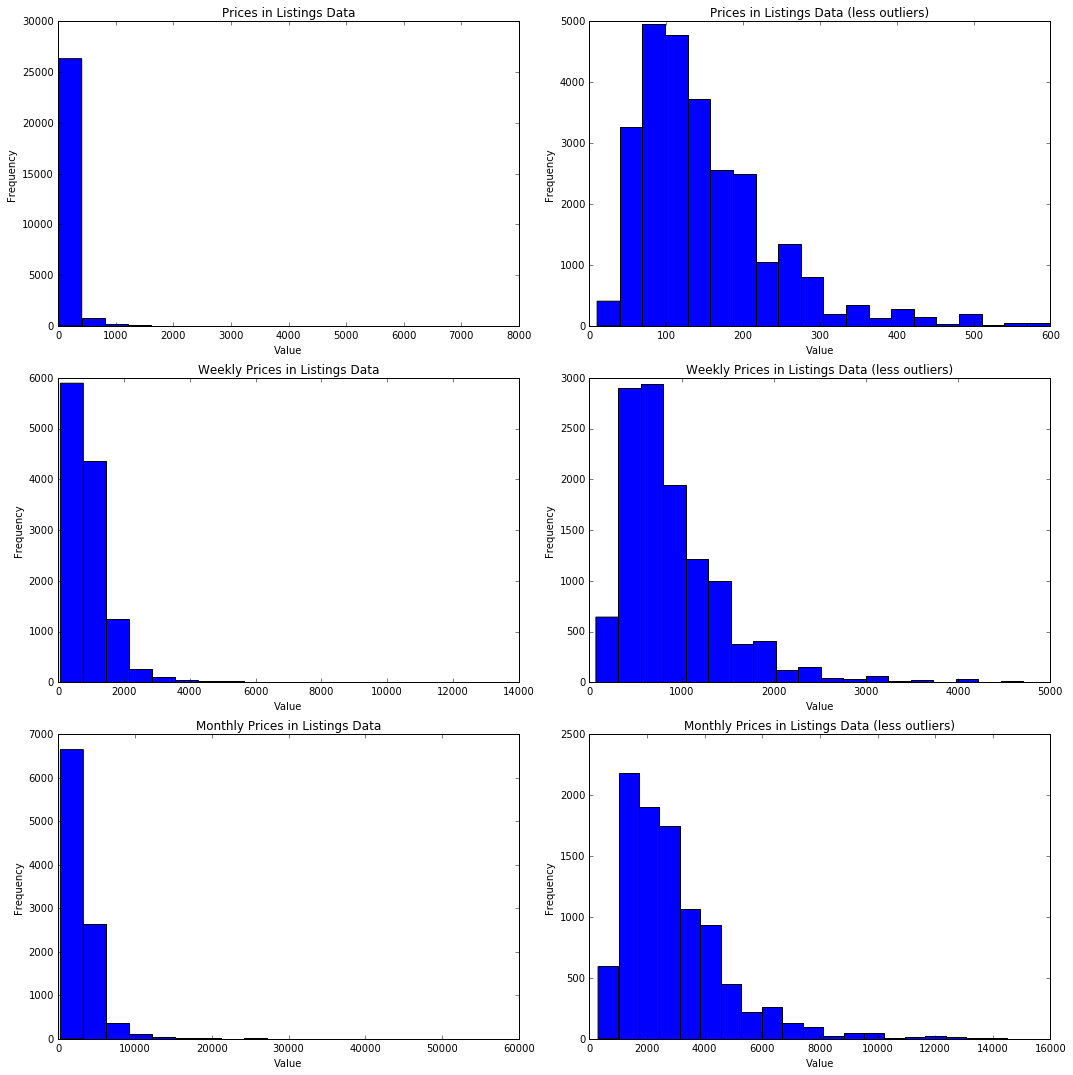

In [20]:
# np arrays for numerical series
price = [val for val in np.array(listings_df['price']) if ~np.isnan(val)]
weekly_price = [val for val in np.array(listings_df['weekly_price']) if ~np.isnan(val)]
monthly_price = [val for val in np.array(listings_df['monthly_price']) if ~np.isnan(val)]

# remove out outliers
price_out = [p for p in price if p < 600]
weekly_price_out = [p for p in weekly_price if p < 5000]
monthly_price_out = [p for p in monthly_price if p < 15000]

# price related variables
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax[0][0] = plot_histogram(price, 'Prices in Listings Data', ax[0][0], 20)
ax[0][1] = plot_histogram(price_out, 'Prices in Listings Data (less outliers)', ax[0][1], 20)

ax[1][0] = plot_histogram(weekly_price, 'Weekly Prices in Listings Data', ax[1][0], 20)
ax[1][1] = plot_histogram(weekly_price_out, 'Weekly Prices in Listings Data (less outliers)', ax[1][1], 20)

ax[2][0] = plot_histogram(monthly_price, 'Monthly Prices in Listings Data', ax[2][0], 20)
ax[2][1] = plot_histogram(monthly_price_out, 'Monthly Prices in Listings Data (less outliers)', ax[2][1], 20)
plt.tight_layout()
plt.show()

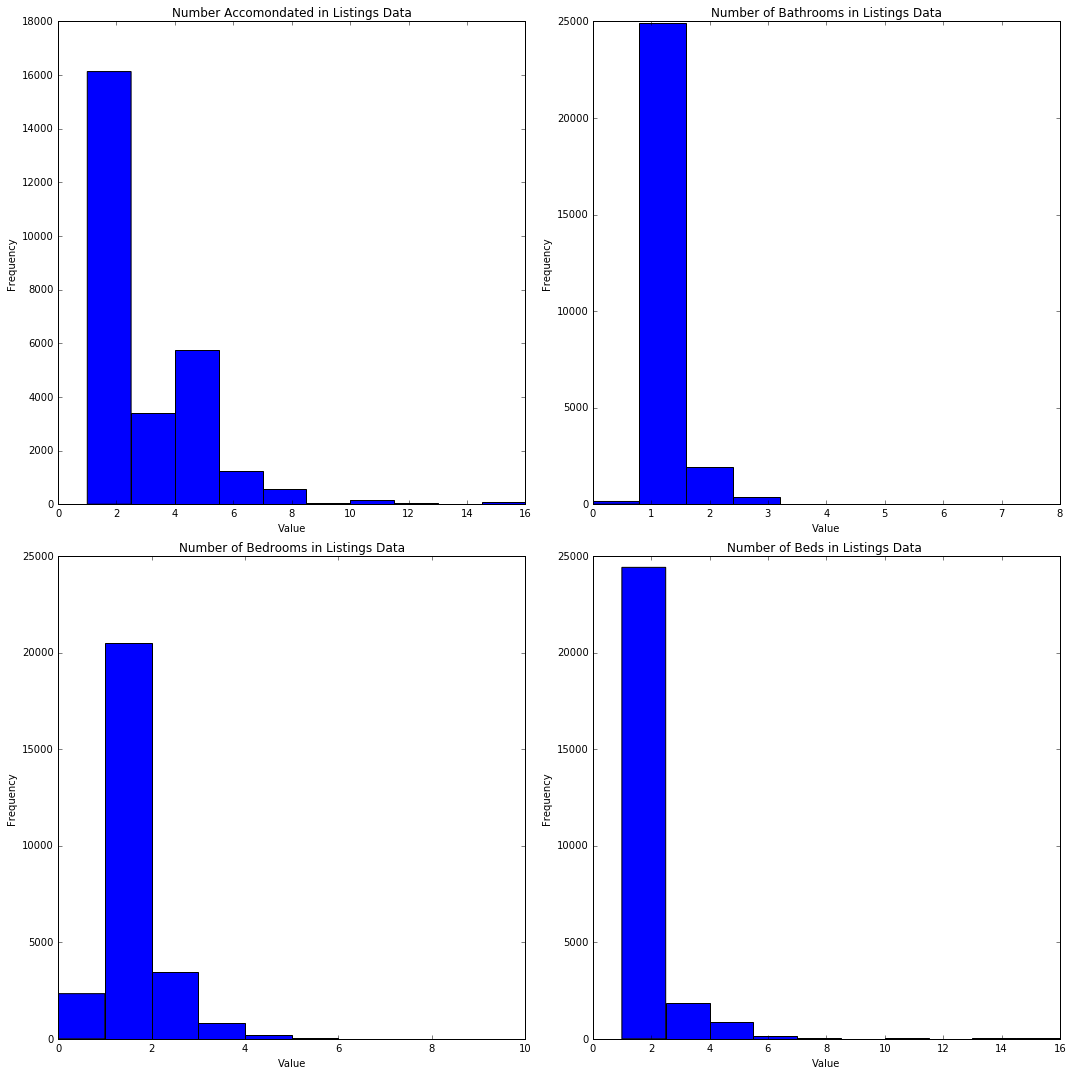

In [21]:
# accomodations related variables
accommodates = np.array(listings_df['accommodates'])
bathrooms = [val for val in np.array(listings_df['bathrooms']) if ~np.isnan(val)]
bedrooms = [val for val in np.array(listings_df['bedrooms']) if ~np.isnan(val)]
beds = [val for val in np.array(listings_df['beds']) if ~np.isnan(val)]

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0] = plot_histogram(accommodates, 'Number Accomondated in Listings Data', ax[0][0], 10)
ax[0][1] = plot_histogram(bathrooms, 'Number of Bathrooms in Listings Data', ax[0][1], 10)

ax[1][0] = plot_histogram(bedrooms, 'Number of Bedrooms in Listings Data', ax[1][0], 10)
ax[1][1] = plot_histogram(beds, 'Number of Beds in Listings Data ', ax[1][1], 10)

plt.tight_layout()
plt.show()

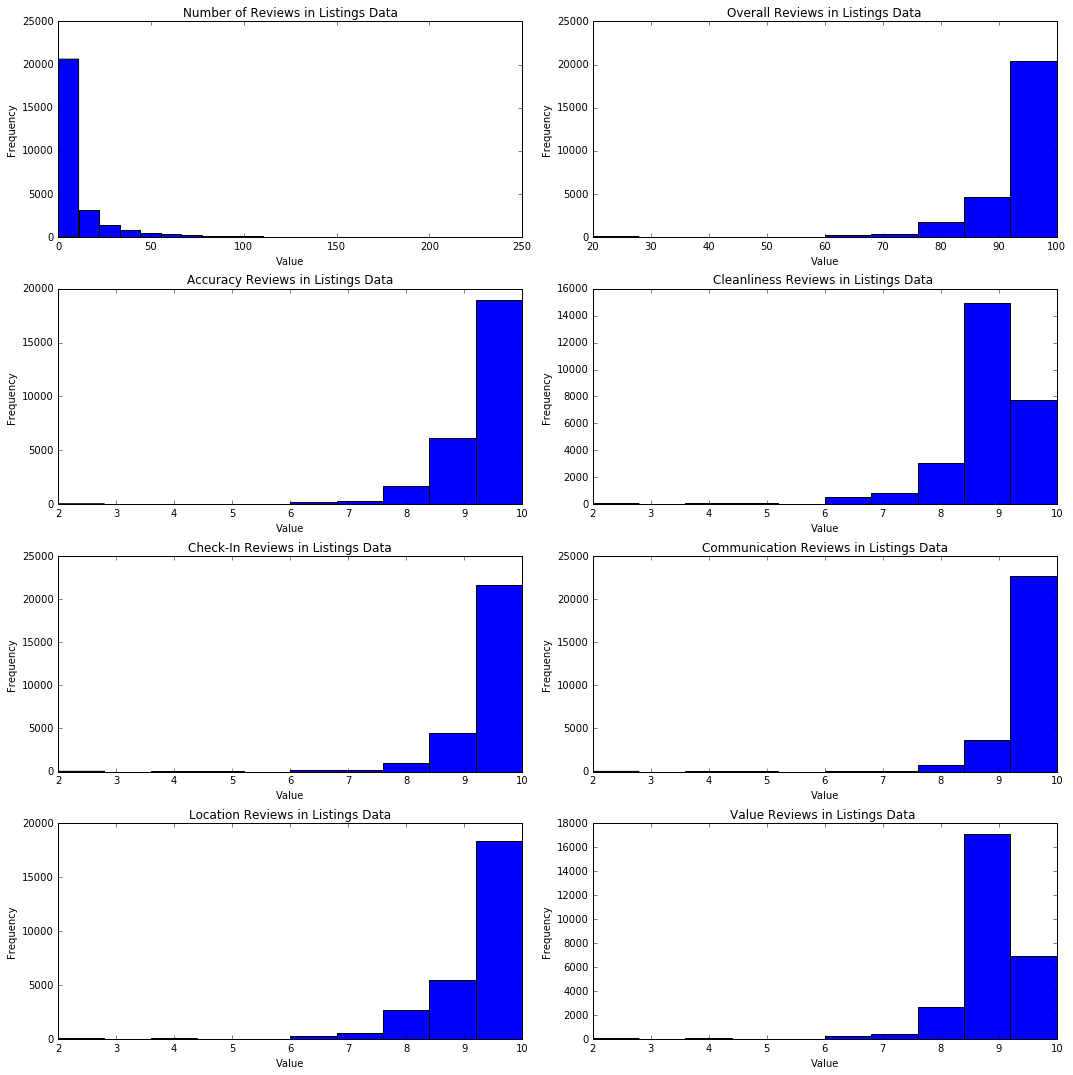

In [22]:
# reviews related variables
number_of_reviews = np.array(listings_df['number_of_reviews'])
review_scores_rating = [val for val in np.array(listings_df['review_scores_rating']) if ~np.isnan(val)]
review_scores_accuracy = [val for val in np.array(listings_df['review_scores_accuracy']) if ~np.isnan(val)]
review_scores_cleanliness = [val for val in np.array(listings_df['review_scores_cleanliness']) if ~np.isnan(val)]
review_scores_checkin = [val for val in np.array(listings_df['review_scores_checkin']) if ~np.isnan(val)]
review_scores_communication = [val for val in np.array(listings_df['review_scores_communication']) if ~np.isnan(val)]
review_scores_location = [val for val in np.array(listings_df['review_scores_location']) if ~np.isnan(val)]
review_scores_value = [val for val in np.array(listings_df['review_scores_value']) if ~np.isnan(val)]

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax[0][0] = plot_histogram(number_of_reviews, 'Number of Reviews in Listings Data', ax[0][0], 20)
ax[0][1] = plot_histogram(review_scores_rating, 'Overall Reviews in Listings Data', ax[0][1], 10)

ax[1][0] = plot_histogram(review_scores_accuracy, 'Accuracy Reviews in Listings Data', ax[1][0], 10)
ax[1][1] = plot_histogram(review_scores_cleanliness, 'Cleanliness Reviews in Listings Data ', ax[1][1], 10)

ax[2][0] = plot_histogram(review_scores_checkin, 'Check-In Reviews in Listings Data', ax[2][0], 10)
ax[2][1] = plot_histogram(review_scores_communication, 'Communication Reviews in Listings Data', ax[2][1], 10)

ax[3][0] = plot_histogram(review_scores_location, 'Location Reviews in Listings Data', ax[3][0], 10)
ax[3][1] = plot_histogram(review_scores_value, 'Value Reviews in Listings Data ', ax[3][1], 10)

plt.tight_layout()
plt.show()

In [23]:
# categorical geographical variables by examining most frequent entries
top_neighborhood = sorted(listings_df.groupby('neighbourhood').size().to_dict().items(), key=operator.itemgetter(1), reverse=True)
top_zipcode = sorted(listings_df.groupby('zipcode').size().to_dict().items(), key=operator.itemgetter(1), reverse=True)
top_property_type = sorted(listings_df.groupby('property_type').size().to_dict().items(), key=operator.itemgetter(1), reverse=True)

print 'Top Neighborhoods'
for k, v in top_neighborhood[:10]:
    print str(k) + ': ' + str(v)
    
print '\nTop Zipcodes'
for k, v in top_zipcode[:10]:
    print str(k) + ': ' + str(v)
    
print '\nTop Property Types'
for k, v in top_property_type[:10]:
    print str(k) + ': ' + str(v)

Top Neighborhoods
unspecified: 2027
Williamsburg: 1878
Upper West Side: 1307
Upper East Side: 1183
Hell's Kitchen: 1177
Bedford-Stuyvesant: 1112
Bushwick: 1023
Lower East Side: 942
Harlem: 861
East Village: 842

Top Zipcodes
11211: 1200
10002: 1130
10009: 1062
10003: 948
10011: 855
11238: 814
10014: 797
10019: 760
11216: 697
10012: 685

Top Property Types
Apartment: 24915
House: 1575
Loft: 601
Bed & Breakfast: 170
Dorm: 49
Other: 48
Boat: 11
Treehouse: 6
Villa: 4
Cabin: 3


### Visualize the supply of Airbnb homes by location and be sure to reflect the price of the average home in each region

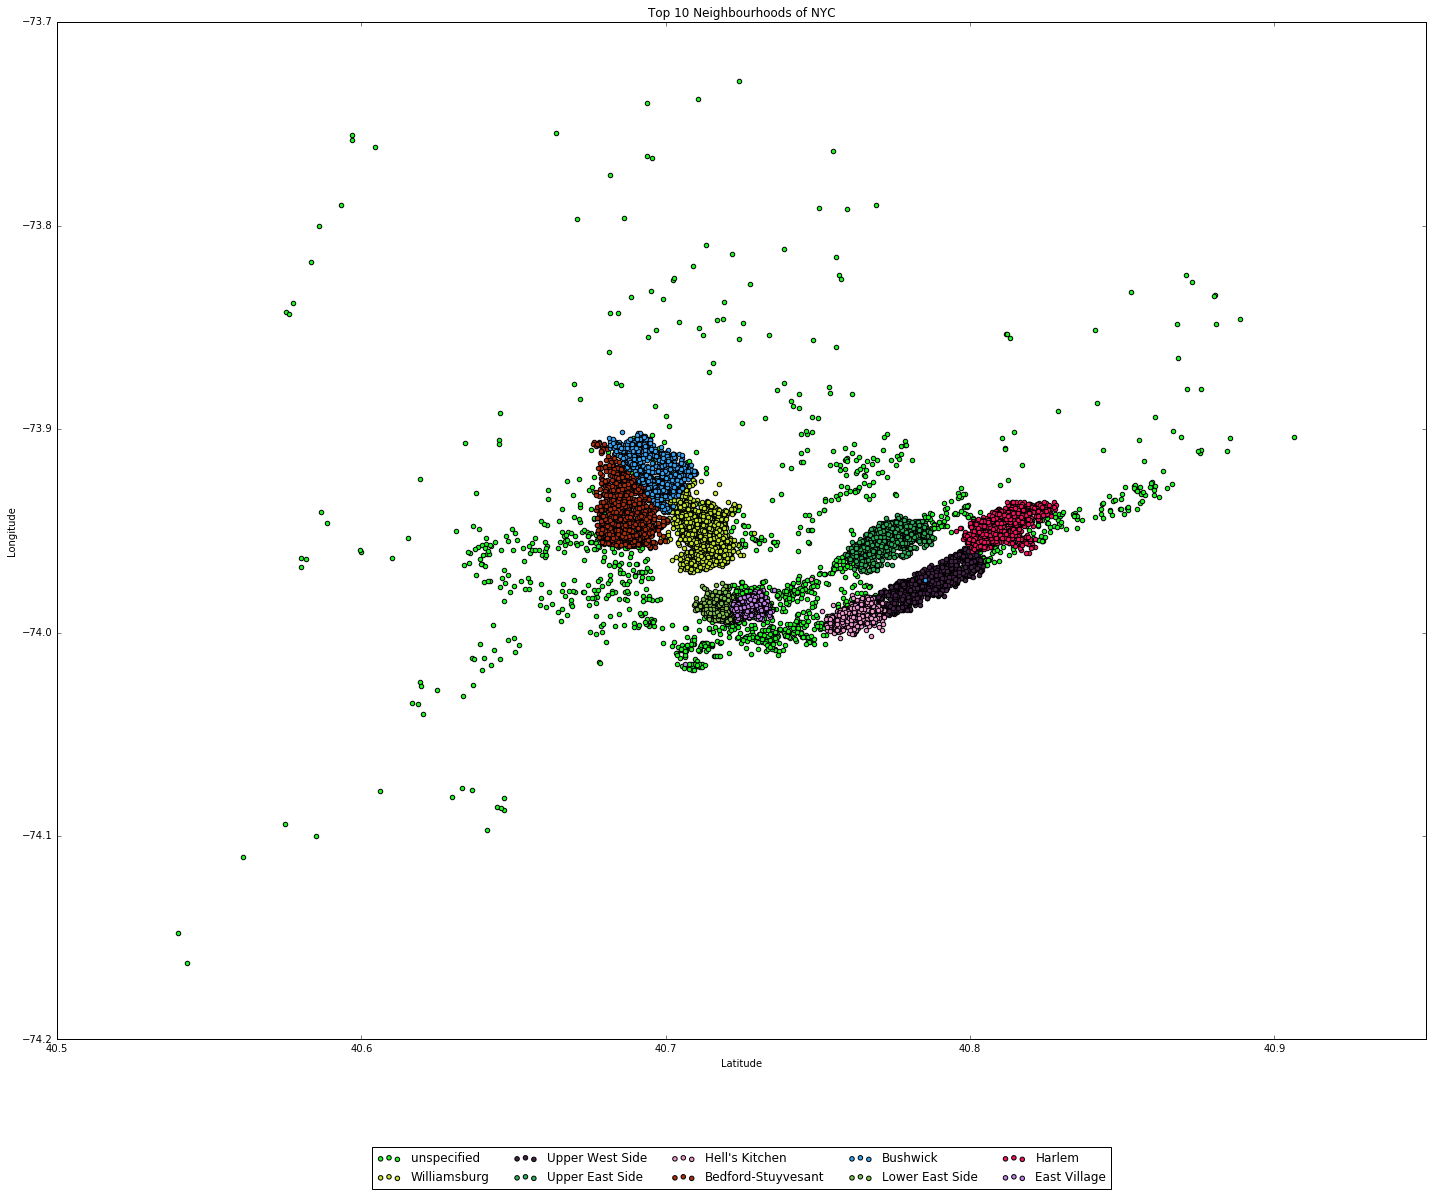

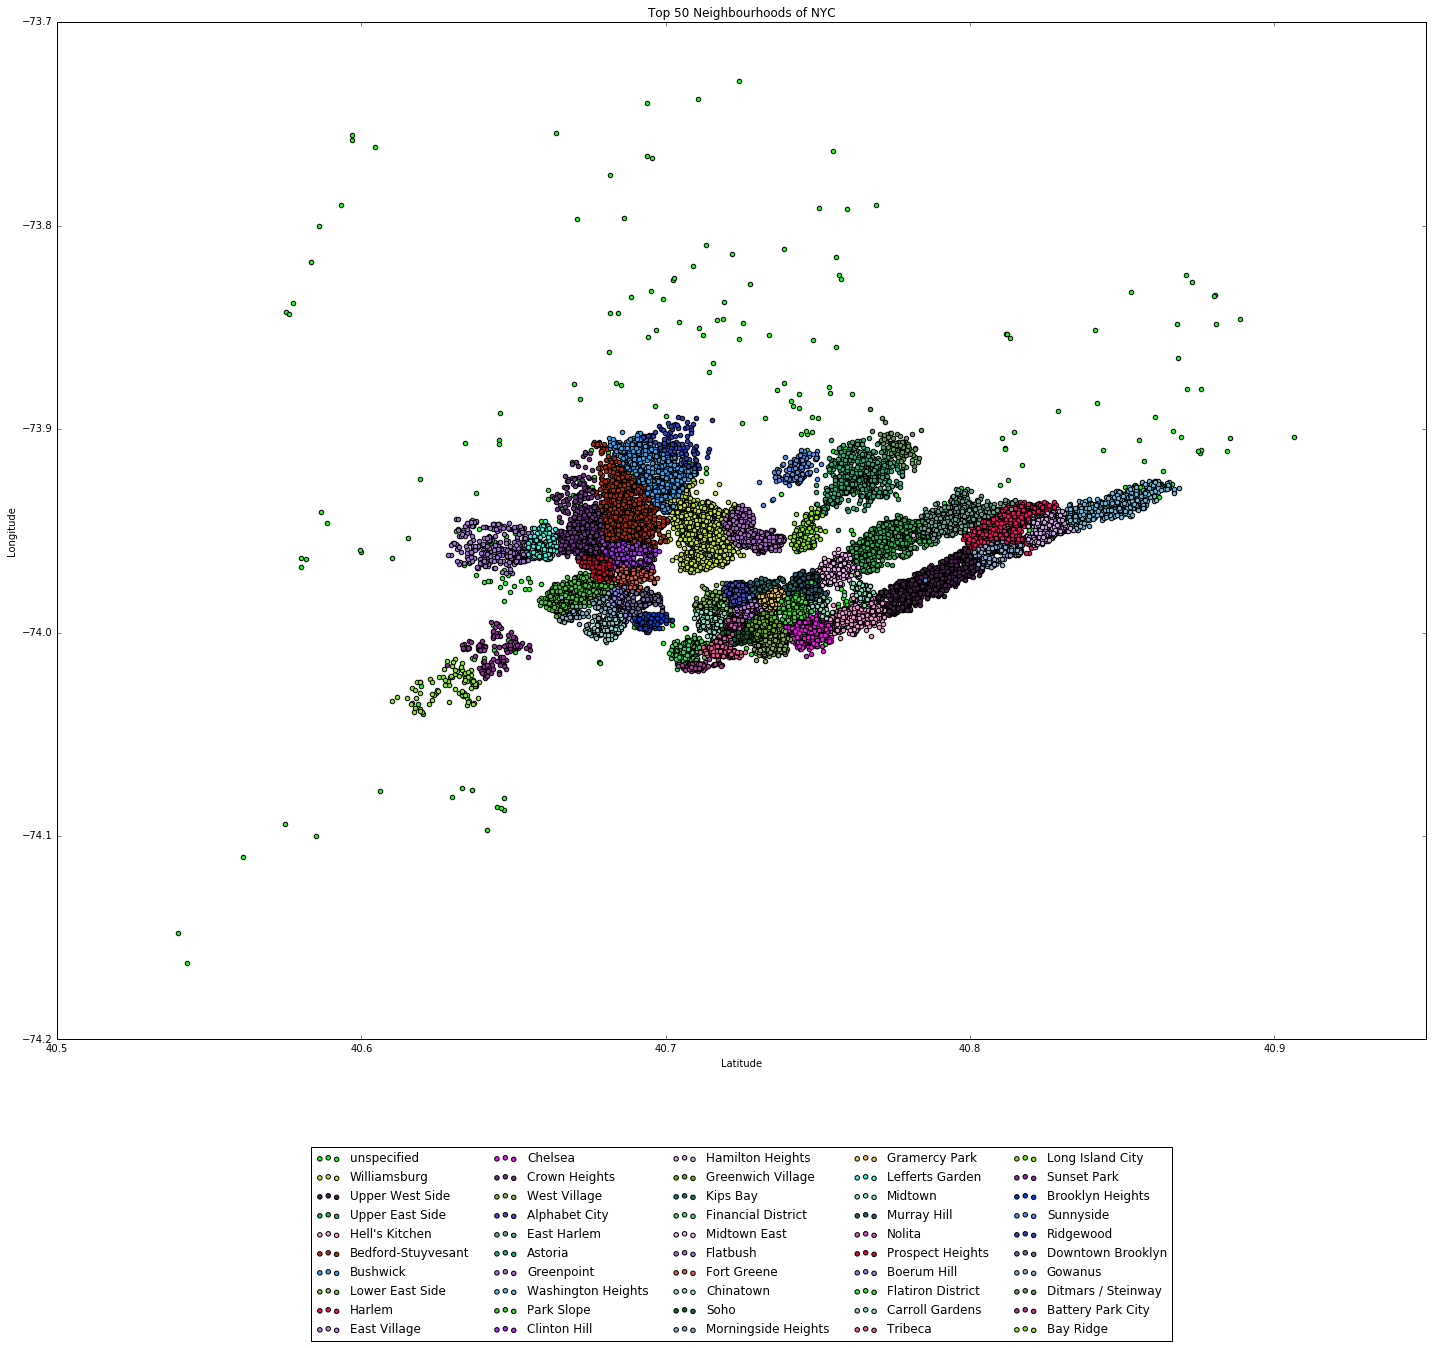

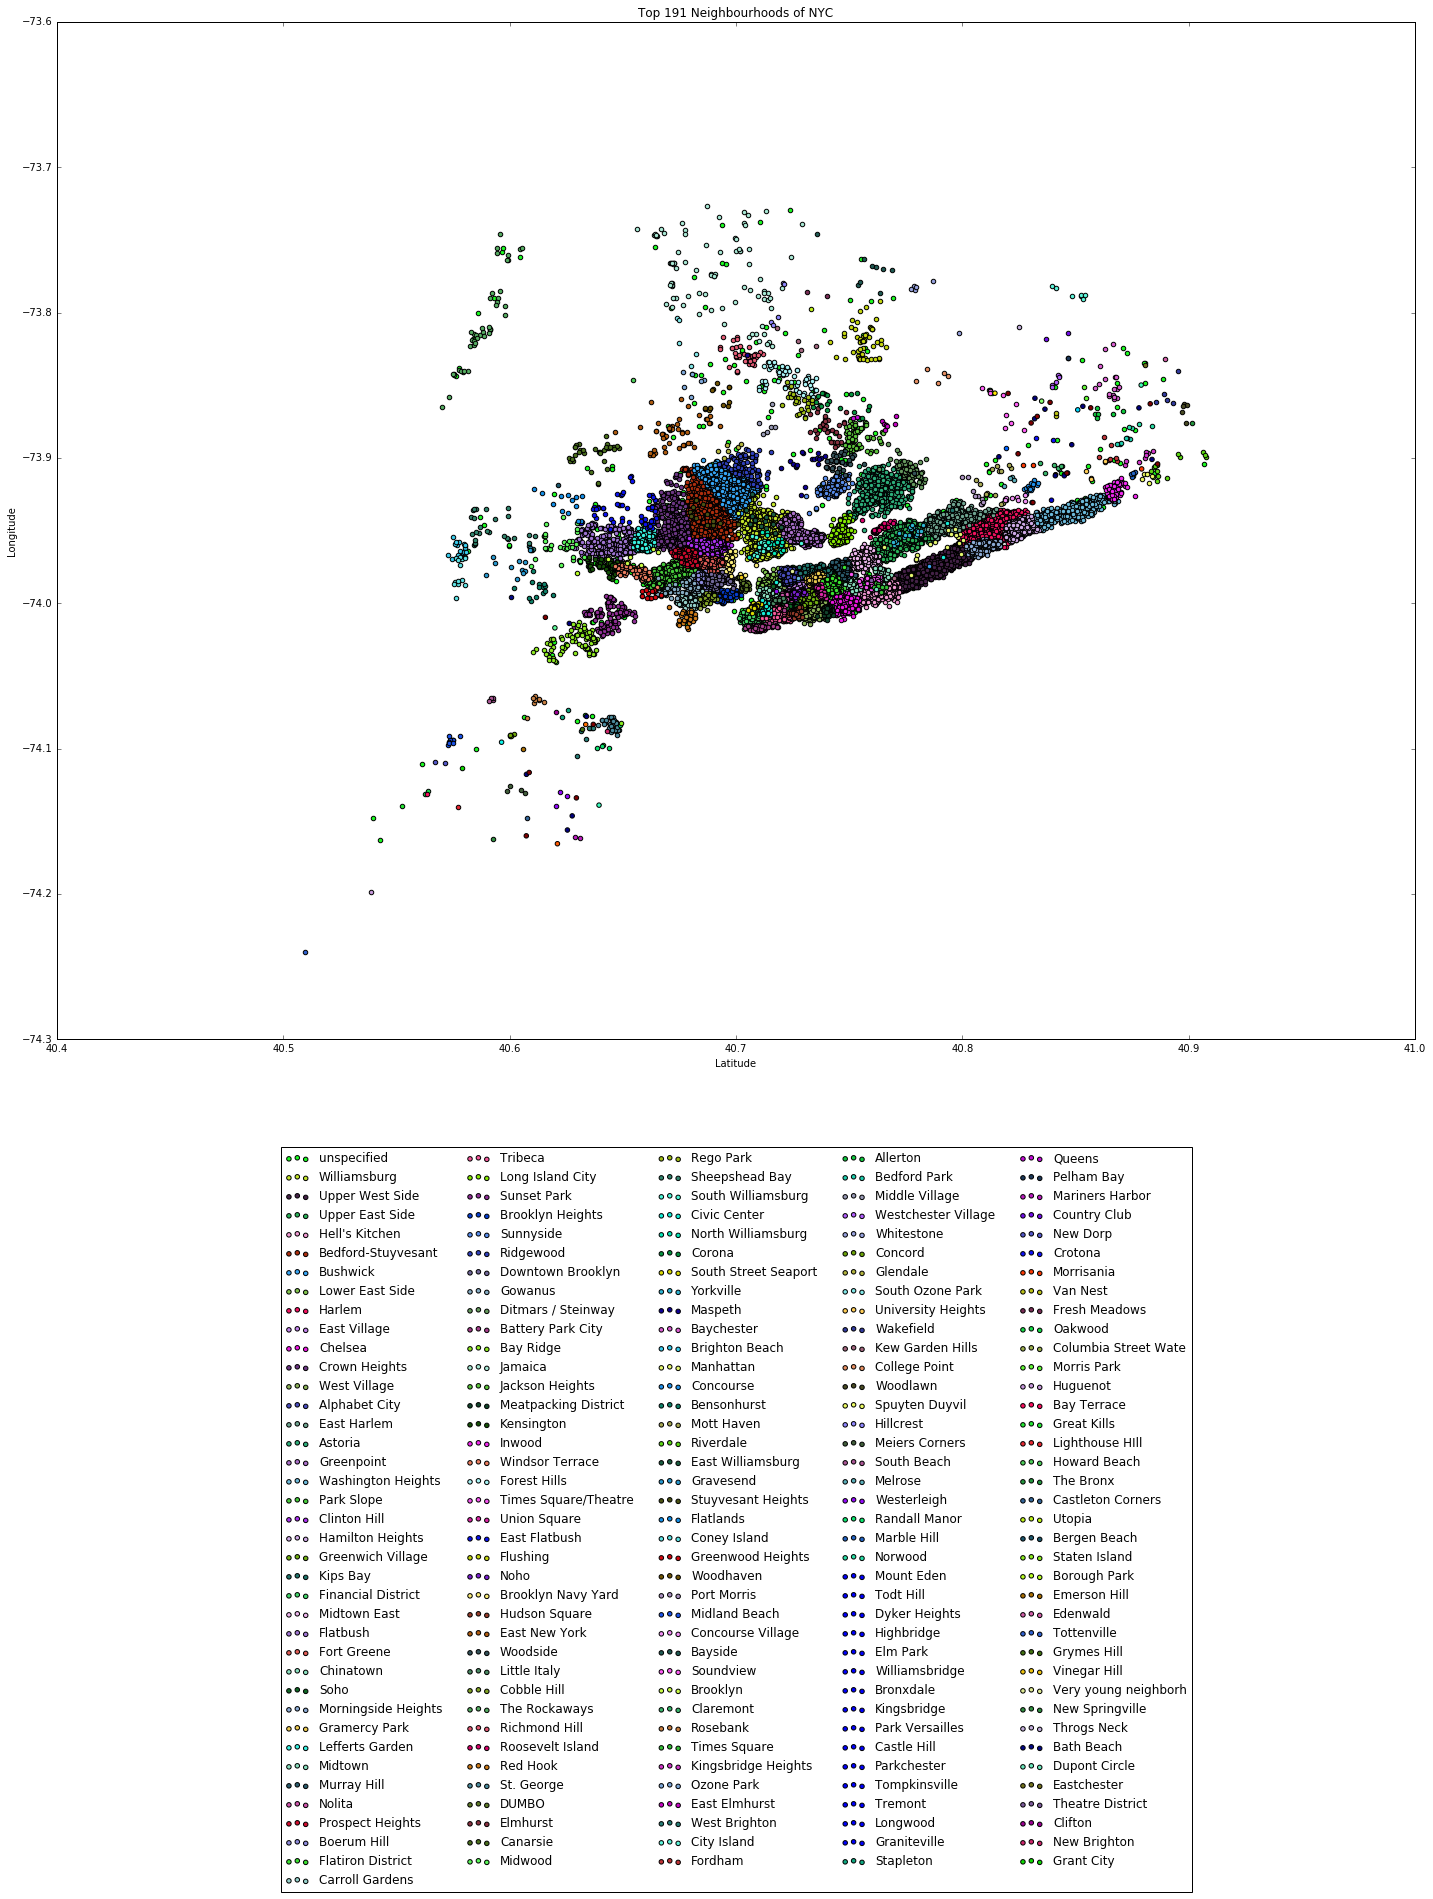

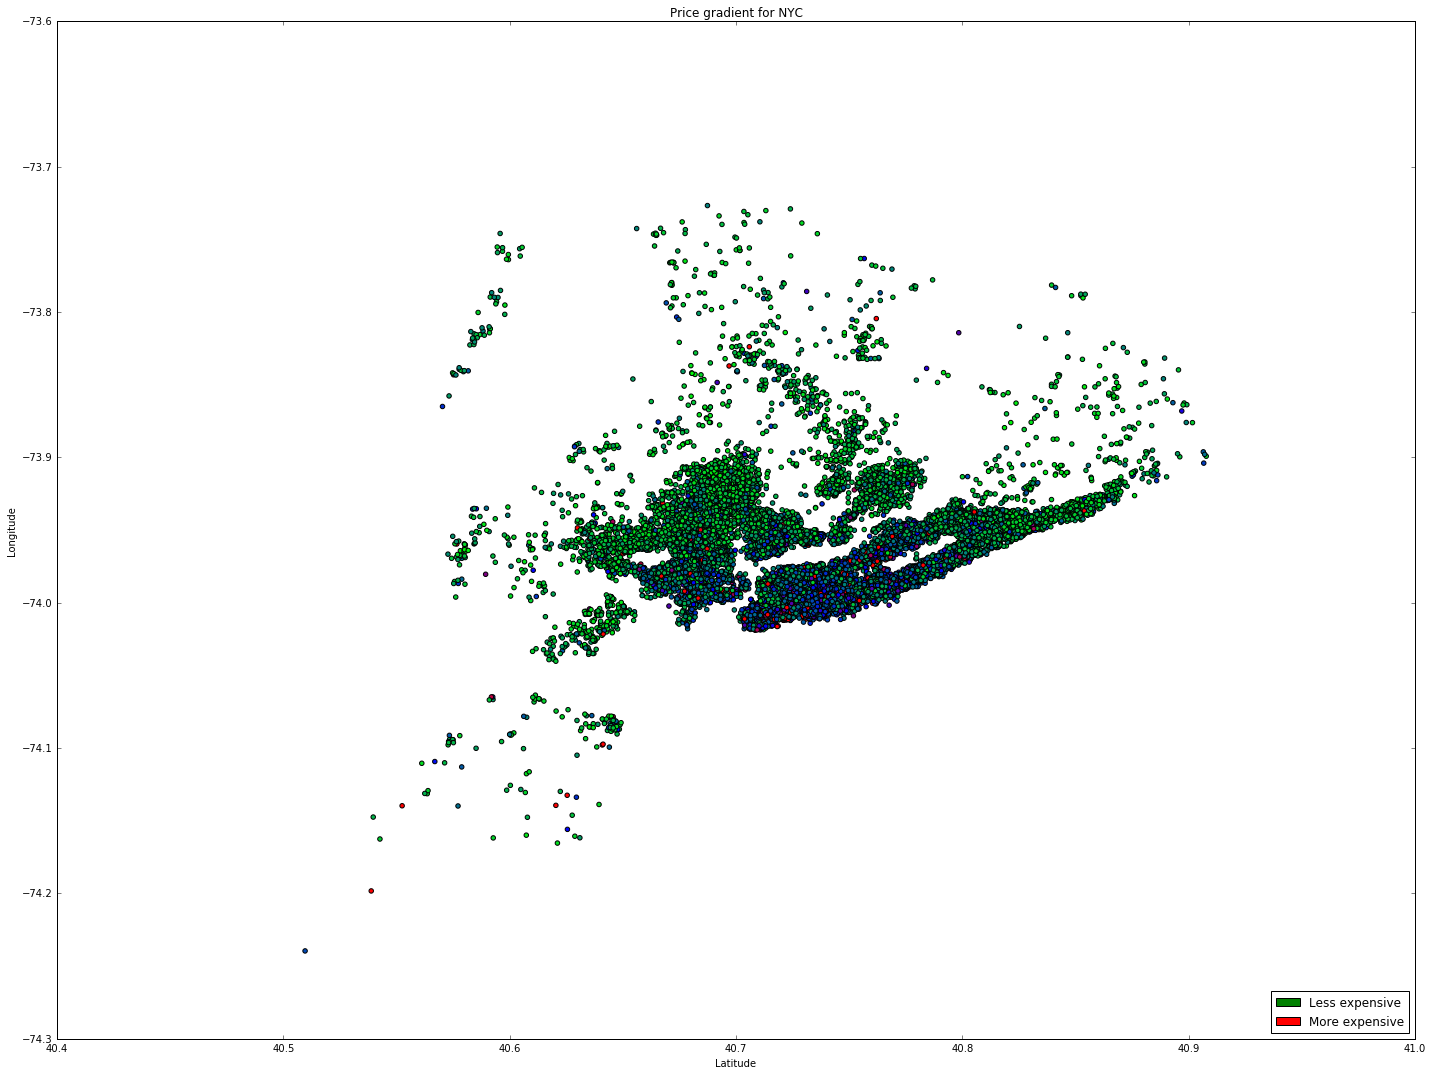

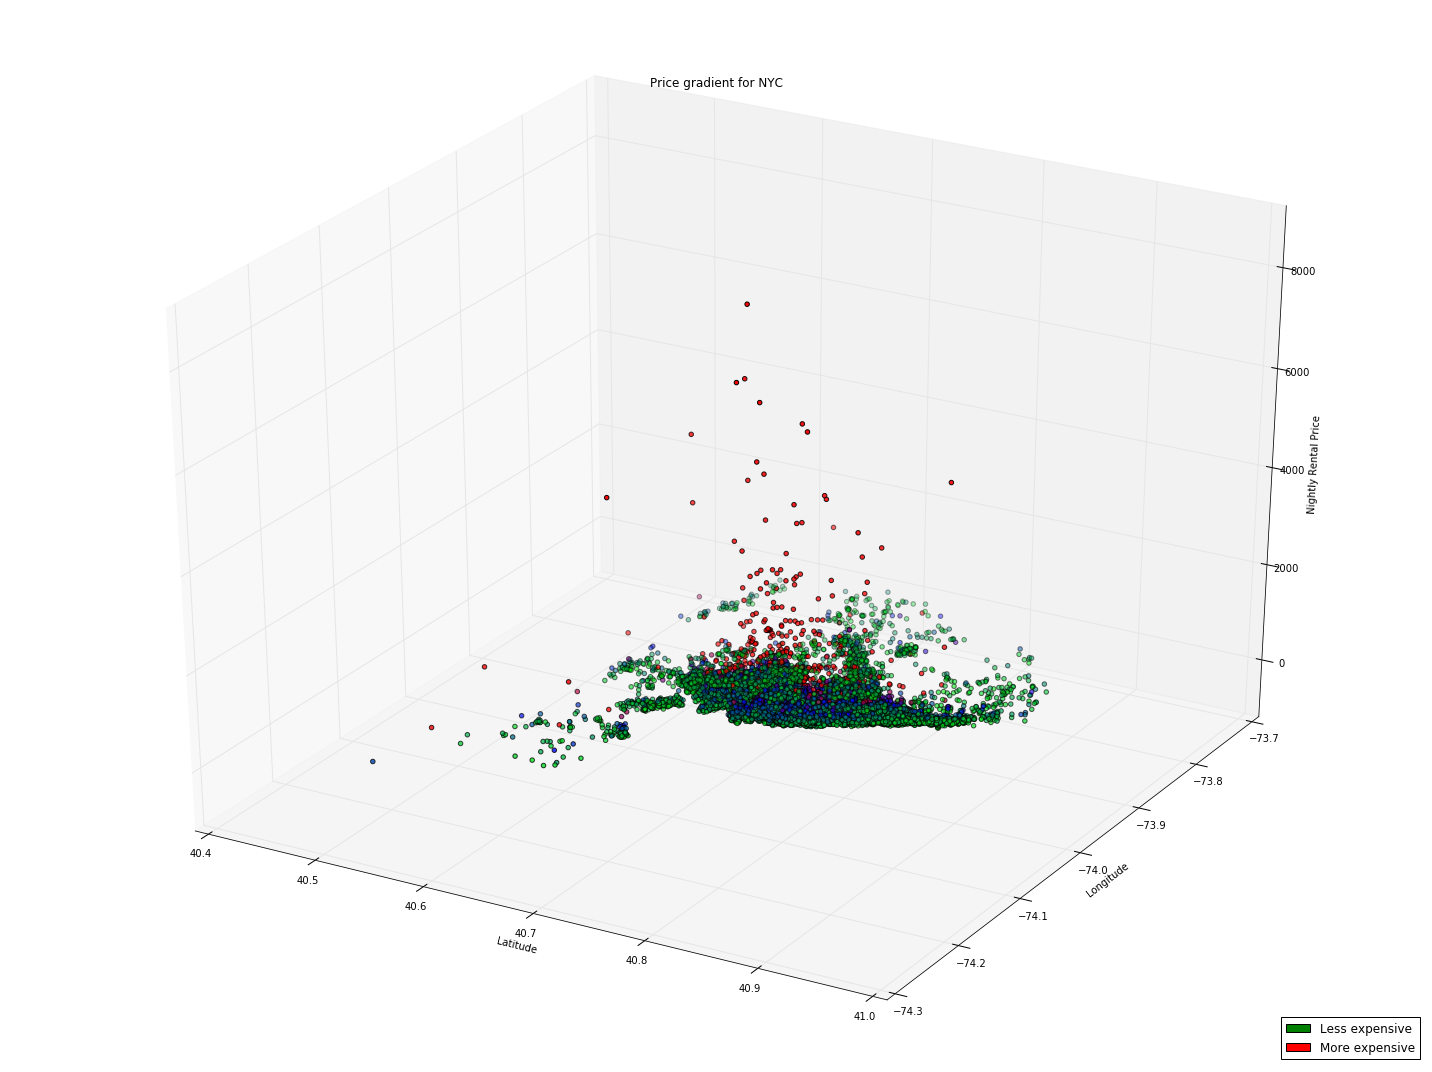

In [24]:
# plot 2D neighborhood to visualize supply of rental homes in each area with color gradient denoting price
def plot_neighborhoods_by_price_2D():
    fig = plt.figure(figsize=(20, 15))

    num_class = len(top_neighborhood)
    
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(listings_df['latitude'], listings_df['longitude'], c=rgb_grad)

    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_title('Price gradient for NYC')
    
    import matplotlib.patches as mpatches
    classes = ['Less expensive', 'More expensive']
    class_colours = ['g', 'r']
    recs = []
    for i in range(0,len(class_colours)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
    plt.legend(recs,classes,loc=4)

    plt.tight_layout()
    plt.show()
    
# plot 3D neighborhood to visualize supply of rental homes in each area with color gradient denoting price
def plot_neighborhoods_by_price_3D():
    fig = plt.figure(figsize=(20, 15))

    num_class = len(top_neighborhood)
    
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(listings_df['latitude'], listings_df['longitude'], listings_df['price'], c=rgb_grad)

    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('Nightly Rental Price')
    ax.set_title('Price gradient for NYC')
    
    import matplotlib.patches as mpatches
    classes = ['Less expensive', 'More expensive']
    class_colours = ['g', 'r']
    recs = []
    for i in range(0,len(class_colours)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
    plt.legend(recs,classes,loc=4)

    plt.tight_layout()
    plt.show()
    
# plot neighborhood to visualize supply of rental homes in each area with color denoting neighborhood
def plot_neighborhood_locations(num_neighborhoods, colors):
    fig = plt.figure(figsize=(20, 15))

    i = 0
    num_class = len(top_neighborhood)
    for (neighborhood, num) in top_neighborhood[0:num_neighborhoods]:
        # adjust length of the printed neighborhood
        if len(neighborhood)>20:
            legend_label = neighborhood[0:20]
        else:
            legend_label = neighborhood
        
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(listings_df[listings_df['neighbourhood'] == str(neighborhood)]['latitude'], 
                   listings_df[listings_df['neighbourhood'] == str(neighborhood)]['longitude'], 
                   c=colors[i], label=legend_label)
        i = i + 1

    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_title('Top ' + str(num_neighborhoods) + ' Neighbourhoods of NYC')
    ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)
    plt.tight_layout()
    plt.show()
    
# for calculating the rgb tuble for the given gradient; red = expensive, green = cheaper
def rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    r = int(max(0, 255*(ratio - 1)))
    g = int(max(0, 255*(1 - ratio)))
    b = 255 - g - r
    return max(min(r/255., 1.), 0), max(min(g/255., 1.), 0), max(min(b/255., 1.), 0)

# build color matrix for coloring-by-neighborhood
import random
random.seed(1)
colors=np.random.random((191, 3))

# build color gradient by price (green -> red)
price = listings_df['price']
price_min = np.min(price_out)
price_max = np.max(price_out)
rgb_grad = np.array([rgb(price_min, price_max, x) for x in price])

# plot top 10 most populous neighborhoods in NYC, coloring by neighborhood
plot_neighborhood_locations(10, colors)
# plot top 50 most populous neighborhoods in NYC, coloring by neighborhood
plot_neighborhood_locations(50, colors)
# plot all neighborhoods in NYC, coloring by neighborhood
plot_neighborhood_locations(191, colors)

# plot all homes with color gradient (green -> red) denoting price
plot_neighborhoods_by_price_2D()
# plot all homes with color gradient (green -> red denoting price) with z-axis price
plot_neighborhoods_by_price_3D()


In [25]:
# build numpy array of average home prices in each region
neighborhood_prices = top_neighborhood
i = 0
for (neighborhood, num) in top_neighborhood:
    neighborhood_prices[i] = [neighborhood, np.mean(np.array(listings_df[listings_df['neighbourhood'] == neighborhood]['price']))]
    i += 1
    
neighborhood_prices

[['unspecified', 160.10557474099656],
 ['Williamsburg', 141.77103301384452],
 ['Upper West Side', 219.63045141545524],
 ['Upper East Side', 202.34319526627218],
 ["Hell's Kitchen", 221.71282922684793],
 ['Bedford-Stuyvesant', 108.0341726618705],
 ['Bushwick', 85.854349951124149],
 ['Lower East Side', 185.75902335456476],
 ['Harlem', 124.31126596980255],
 ['East Village', 197.63895486935866],
 ['Chelsea', 253.42839951865221],
 ['Crown Heights', 107.24738219895288],
 ['West Village', 265.93038821954485],
 ['Alphabet City', 172.76512968299713],
 ['East Harlem', 131.85128205128206],
 ['Astoria', 107.58752166377816],
 ['Greenpoint', 141.02631578947367],
 ['Washington Heights', 110.08128544423441],
 ['Park Slope', 153.54684512428298],
 ['Clinton Hill', 185.64932562620425],
 ['Hamilton Heights', 105.3507972665148],
 ['Greenwich Village', 240.1846153846154],
 ['Kips Bay', 249.80462724935734],
 ['Financial District', 236.36559139784947],
 ['Midtown East', 248.81440443213296],
 ['Flatbush', 106.

### Correlations between price and features of home

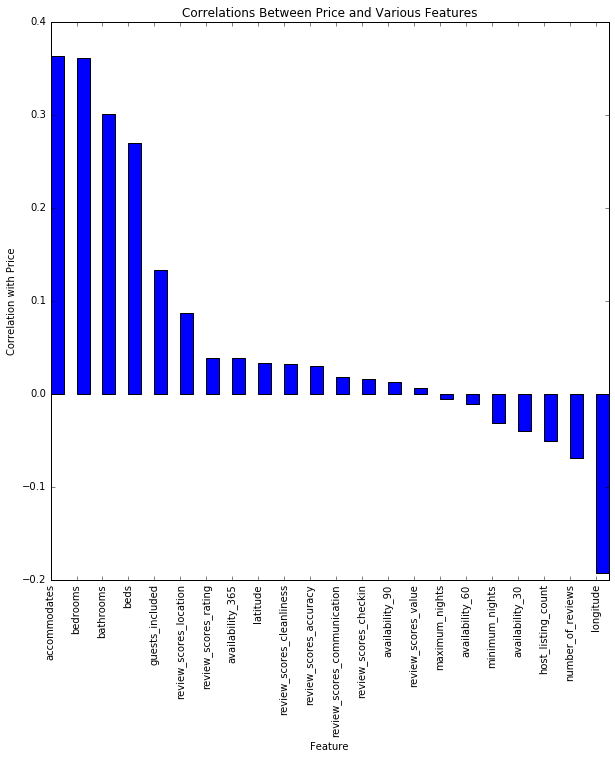

In [26]:
# get correlations on price
corrs_dict = (listings_df.corr())['price'].to_dict()

# delete irrelevant features
for var in ['price', 'weekly_price', 'monthly_price', 'scrape_id', 'host_id', 'listing_id']:
    del corrs_dict[var]

# sort by correlation value
price_corrs = sorted(corrs_dict.items(), key=operator.itemgetter(1), reverse=True)

# break into two lists
features, corrs = zip(*price_corrs)

# plot correlations
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_ylabel('Correlation with Price')
ax.set_xlabel('Feature')
ax.set_title('Correlations Between Price and Various Features')
plt.xticks(range(len(corrs)), features, rotation='vertical')
ax.bar(range(len(corrs)), corrs, .5, color="blue")
plt.show()

### Relationship between price and time

In [27]:
# method to convert date to day of week
def get_day(date):
    return datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A')

In [28]:
date_prices = {date: 0 for date in calendar_df['date'].unique()}
day_prices = {get_day(date): 0 for date in calendar_df['date'].unique()}
day_counts = {get_day(date): 0 for date in calendar_df['date'].unique()}

for date in calendar_df['date'].unique():
    prices = [p for p in np.array(calendar_df[calendar_df['date'] == date]['price']) if ~np.isnan(p)]
    date_prices[date] = np.mean(prices)
    day_prices[get_day(date)] += np.sum(prices)
    day_counts[get_day(date)] += len(prices)

In [29]:
for day, price_sum in day_prices.iteritems():
    day_prices[day] = float(day_prices[day]) / float(day_counts[day])

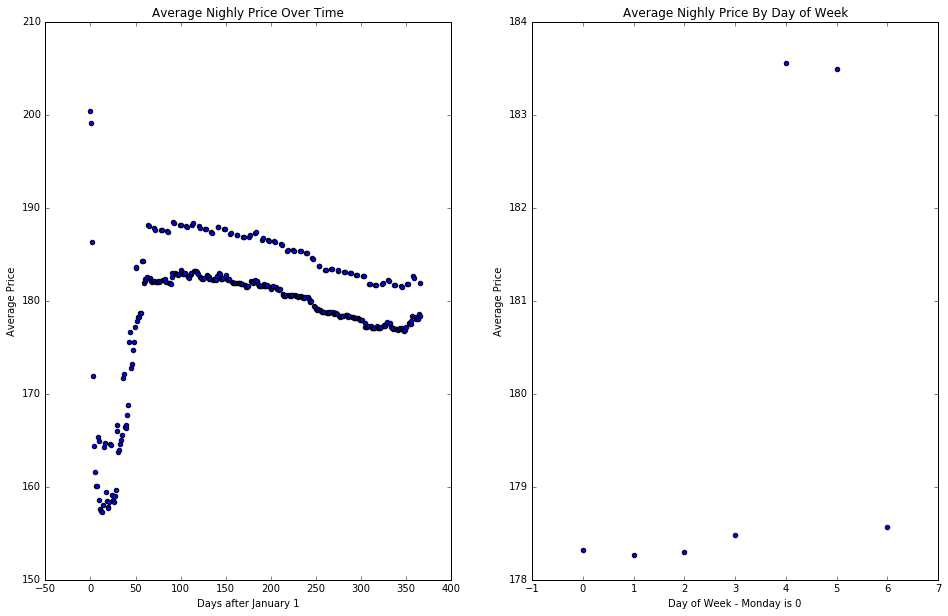

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ordered_date_prices = [value for key, value in sorted(date_prices.items())]
ax[0].scatter(range(367), ordered_date_prices)
ax[1].scatter(range(7), [day_prices['Monday'], day_prices['Tuesday'], day_prices['Wednesday'], day_prices['Thursday'], day_prices['Friday'], day_prices['Saturday'], day_prices['Sunday']])

# Label axes, set title
ax[0].set_title('Average Nighly Price Over Time')
ax[0].set_xlabel('Days after January 1')
ax[0].set_ylabel('Average Price')

ax[1].set_title('Average Nighly Price By Day of Week')
ax[1].set_xlabel('Day of Week - Monday is 0')
ax[1].set_ylabel('Average Price')

plt.show()

In [31]:
# dictionary to contain means
listing_means = {listing: 0 for listing fin calendar_df['listing_id'].unique()}

# calculate mean prices for each listing
for listing in calendar_df['listing_id'].unique():
    listing_means[listing] = np.mean(calendar_df[calendar_df['listing_id'] == listing]['price'])
    
# convert to numpy for efficiency
prices = np.array(calendar_df['price'])
ids = np.array(calendar_df['listing_id'])
diff_means = []
for i in range(len(prices)):
    diff_means.append(prices[i] - listing_means[ids[i]]) 
    
# add to calendar df
calendar_df['diff_mean'] = pd.Series(np.array(diff_means), index=calendar_df.index)

In [32]:
# calculate average difference from means over all listings
avg_diff_means = {date: 0 for date in calendar_df['date'].unique()}
for date, mean in avg_diff_means.iteritems():
    avg_diff_means[date] = np.mean(calendar_df[calendar_df['date'] == date]['diff_mean'])
    
# calculate average difference from means by day of week
# convert to numpy for speed
dates = np.array(calendar_df['date'])
day_avg_diff_means = {get_day(date): 0 for date in calendar_df['date'].unique()}
for i in range(len(prices)):
    day_avg_diff_means[get_day(dates[i])] += diff_means[i]
for day, avg_diff in day_avg_diff_means.iteritems():
    day_avg_diff_means[day] = float(day_avg_diff_means[day]) / float(day_counts[day])

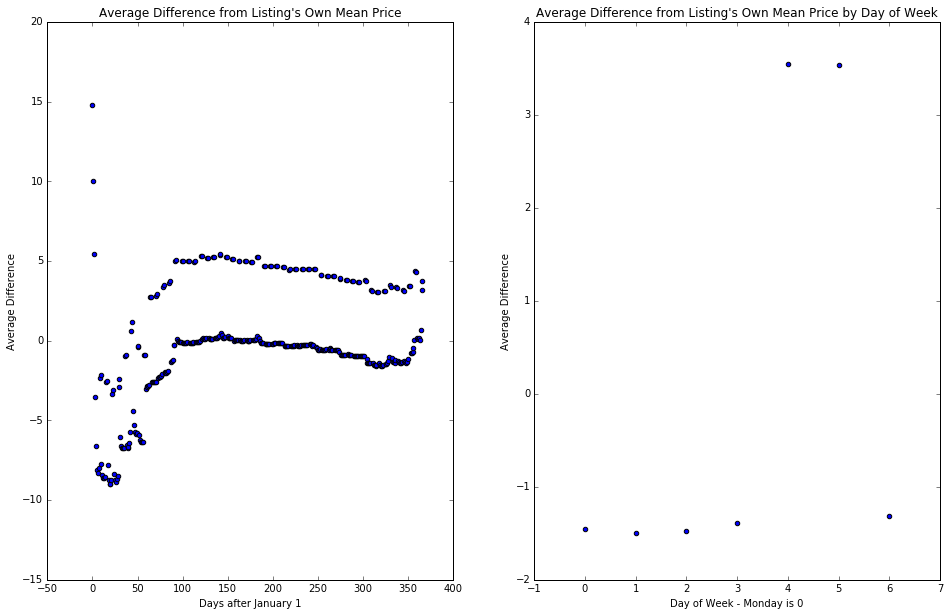

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ordered_avg_diff_means = [value for key, value in sorted(avg_diff_means.items())]
ax[0].scatter(range(367), ordered_avg_diff_means)
ax[1].scatter(range(7), [day_avg_diff_means['Monday'], day_avg_diff_means['Tuesday'], day_avg_diff_means['Wednesday'], day_avg_diff_means['Thursday'], day_avg_diff_means['Friday'], day_avg_diff_means['Saturday'], day_avg_diff_means['Sunday']])

# Label axes, set title
ax[0].set_title('Average Difference from Listing\'s Own Mean Price')
ax[0].set_xlabel('Days after January 1')
ax[0].set_ylabel('Average Difference')

ax[1].set_title('Average Difference from Listing\'s Own Mean Price by Day of Week')
ax[1].set_xlabel('Day of Week - Monday is 0')
ax[1].set_ylabel('Average Difference')

plt.show()

In [34]:
# examine priciest and cheapest dates
sorted_avg_diffs = sorted(avg_diff_means.items(), key=lambda x: x[1])
print 'Dates with lowest average differences from mean:'
for date, diff in sorted_avg_diffs[:15]:
    print date + ', ' + get_day(date) + ': $' + str(round(diff, 2))
    
print '\nDates with highest average differences from mean:'
for date, diff in sorted_avg_diffs[-15:]:
    print date + ', ' + get_day(date) + ': $' + str(round(diff, 2))

Dates with lowest average differences from mean:
2015-01-21, Wednesday: $-9.01
2015-01-20, Tuesday: $-8.99
2015-01-27, Tuesday: $-8.85
2015-01-22, Thursday: $-8.76
2015-01-26, Monday: $-8.76
2015-01-19, Monday: $-8.71
2015-01-28, Wednesday: $-8.68
2015-01-14, Wednesday: $-8.6
2015-01-13, Tuesday: $-8.59
2015-01-15, Thursday: $-8.55
2015-01-29, Thursday: $-8.48
2015-01-12, Monday: $-8.44
2015-01-25, Sunday: $-8.35
2015-01-07, Wednesday: $-8.3
2015-01-06, Tuesday: $-8.13

Dates with highest average differences from mean:
2015-05-08, Friday: $5.18
2015-05-09, Saturday: $5.19
2015-05-15, Friday: $5.22
2015-07-03, Friday: $5.23
2015-05-16, Saturday: $5.24
2015-05-29, Friday: $5.24
2015-05-30, Saturday: $5.24
2015-07-04, Saturday: $5.25
2015-05-02, Saturday: $5.29
2015-05-01, Friday: $5.29
2015-05-22, Friday: $5.39
2015-05-23, Saturday: $5.42
2015-01-03, Saturday: $5.44
2015-01-02, Friday: $10.0
2015-01-01, Thursday: $14.76


### Visualize the target variable to understand skewness and identify transformation that might be necessary
The target variable "price" was analyzed to investigate the the distribution of the data.  The histogram below shows that the variable is skewed right.  This indicates that there are large outliers in price and that the target variable would need to be transformed to create a normal distribution that would be beneficial for predictive modeling.

A log transformation was conducted on the target variable "price".  This transformation resulted in a normal distribution that would be ideal for predictive modeling.

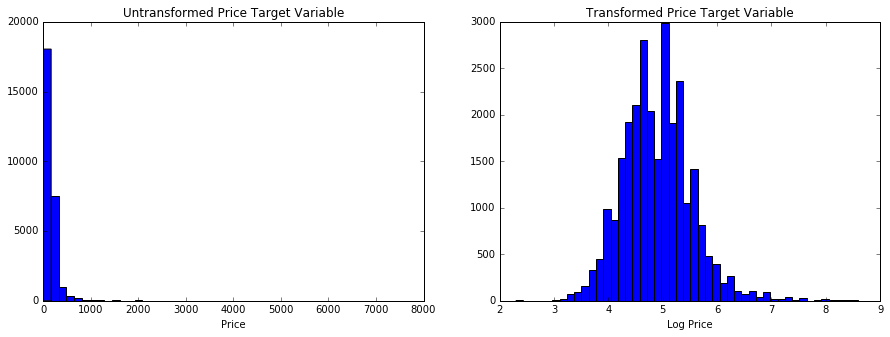

In [35]:
listings_df['price_log'] = np.log(listings_df['price'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(listings_df['price'],bins=50)
ax[0].set_title('Untransformed Price Target Variable')
ax[0].set_xlabel('Price')

ax[1].hist(listings_df['price_log'],bins=50)
ax[1].set_title('Transformed Price Target Variable')
ax[1].set_xlabel('Log Price')

As a second level of analysis, the price variable was visulaized by a boxplot.  This visualization confirms the extreme outliers for price and the need to transform the target variable.

The log transformed "price" variable was analyzed further by a boxplot to confirm that the outlier prices were now within a reasonable range.

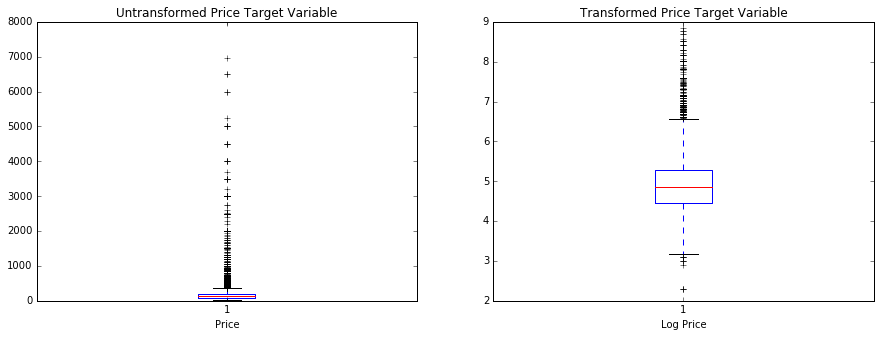

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(listings_df['price'])
ax[0].set_title('Untransformed Price Target Variable')
ax[0].set_xlabel('Price')

ax[1].boxplot(listings_df['price_log'])
ax[1].set_title('Transformed Price Target Variable')
ax[1].set_xlabel('Log Price')

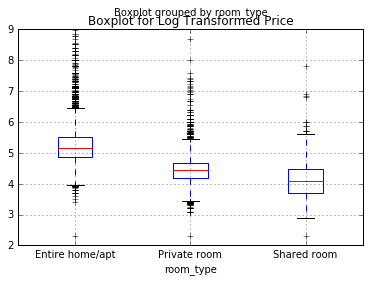

In [37]:

listings_df.boxplot(column='price_log', by ='room_type')
plt.title('Boxplot for Log Transformed Price')

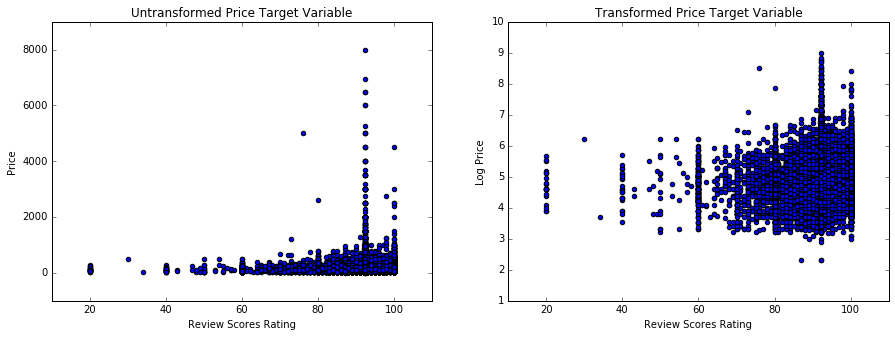

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(listings_df['review_scores_rating'], listings_df['price'])
ax[0].set_title('Untransformed Price Target Variable')
ax[0].set_xlabel('Review Scores Rating')
ax[0].set_ylabel('Price')
ax[1].scatter(listings_df['review_scores_rating'], listings_df['price_log'])
ax[1].set_title('Transformed Price Target Variable')
ax[1].set_ylabel('Log Price')
ax[1].set_xlabel('Review Scores Rating')

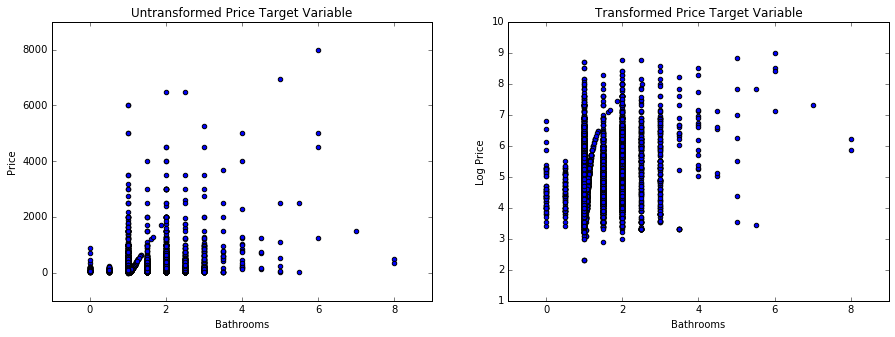

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(listings_df['bathrooms'], listings_df['price'])
ax[0].set_title('Untransformed Price Target Variable')
ax[0].set_xlabel('Bathrooms')
ax[0].set_ylabel('Price')
ax[1].scatter(listings_df['bathrooms'], listings_df['price_log'])
ax[1].set_title('Transformed Price Target Variable')
ax[1].set_ylabel('Log Price')
ax[1].set_xlabel('Bathrooms')

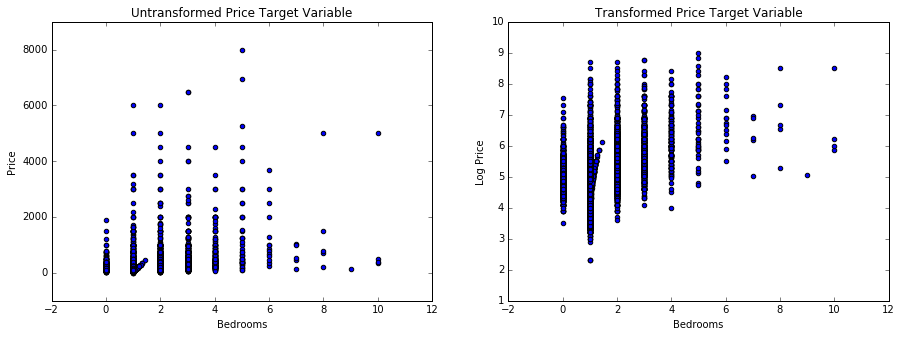

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(listings_df['bedrooms'], listings_df['price'])
ax[0].set_title('Untransformed Price Target Variable')
ax[0].set_xlabel('Bedrooms')
ax[0].set_ylabel('Price')
ax[1].scatter(listings_df['bedrooms'], listings_df['price_log'])
ax[1].set_title('Transformed Price Target Variable')
ax[1].set_ylabel('Log Price')
ax[1].set_xlabel('Bedrooms')

In [41]:
# export cleaned data with new fields to CSVs
listings_df.to_csv('datasets/listings_final.csv')
reviews_df.to_csv('datasets/reviews_final.csv')
calendar_df.to_csv('datasets/calendar_final.csv')


---

## Modelling
### Explanation of Modelling Choices Made in this Part
#### Additional Categorical Variables Created
It is clear from the visualization of average price against the day of the year that first three months of the year see lower average prices than the remaineder of the year (with the exception of around New Years). Previously, this was incorporated into the model by including a cateorical variable indicating whether each observation fell in this slump period. However, it can also be seen that even during the slump, it appears that some months (partiuclarly January) are worse than others. Thus, we also create three new categorical variables for each of January, February, and March to incorporate more time-related nuance into the model.

We chose to preserve the quartile representation of zipcodes and neighborhoods, since we fear that including more specific indicators (such as for each zipcode) would lead to drastic overfitting. On examining other approaches for the encoding of these variables, we come to realize that other clustering approaches such as K-means is not suited to this task since we are dealing with categorical data that can not be grouped well in a continuous fashion.

Indicators were also created for each of the property types, each of the room types, and each of the bed types. Since each of these categories has relatively few distinct values, it seems that creating one indicator for each distinct value is less likely to lead to severe overfitting or over-complication of the model. Nevertheless, it will be important to perform regularization to avoid potential overfitting.

#### Transformations and Interactions
Each of the continuous variables is plotted against the response variable, the log of price, in order to determine if there are significant non-linear relationships between the variables. From the plots, we see that a quadratic term for  longitude, host listing count, and the value rating produce a more linear relationship with log price, so these transformations are generated.

Since an exhuastive search of possible interaction terms to include would involve roughly $\binom{70}{2} = 2415$ interactions to examine, this approach is not feasible computationally. Instead, we rely on our intuitive understanding of the relationships between the variables to anticiapte which interaction terms would be meaningful. Using this approach, we include interactions for both weekend and holiday with both number of bedrooms and number of guests accomodated. This interaction seems potentially reasonable because one could imagine that in particularly high demand times, larger or more accomodating properties are especially valuable.

#### General Modelling Approach and Assumptions Possibly Violated
We choose to model our data by including a single observation for each listing for each day it is offered. This is potentially problematic for two reasons. Firstly, it violates OLS assumption that each observation is independent, because it is obvious that the listings for a given property on different days are highly dependent. Secondly, this may bias our regressions such that the relationships present in properties that are offered more regularly are more highly weighted.

Despite these potential violations, we maintain this data representation because it fully encodes the all of the information we have, both related to the properties, the time of year, and the relationship between properties and the time of year (which we exploit in creating some interaction variables, as described above). We feel that it is reasonable to potentially violate the i.i.d. assumption since the size of our data set is so large (millions of listings) compared to the size of the sets of dependent observations (maximum size of 365). Additionally, we feel that biasing the results towards properties that are more frequently offered is not necessarily detrimental, since we expect these types of properties to be offered more frequently in the future as well, leading to potentially better performance on future test sets.

In [1]:
# import necessary libraries
import csv
import datetime
import operator
import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor as RandomForest
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# read the three cleaned datasets
listings_df = pd.read_csv('datasets/listings_final.csv', delimiter=',', index_col=0)
reviews_df = pd.read_csv('datasets/reviews_final.csv', delimiter=',', index_col=0)
calendar_df = pd.read_csv('datasets/calendar_final.csv', index_col=0)

# log transform prices in calendar
calendar_df['price_log'] = np.log(calendar_df['price'])

/Applications/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,2,6,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
calendar_df.drop(['available'], axis=1, inplace=True, errors='ignore')
listings_df.drop(['scrape_id', 'last_scraped', 'name', 'picture_url', 'host_id', 'host_name', 'host_since',
                  'host_picture_url', 'weekly_price', 'monthly_price', 'calendar_last_scraped', 'calendar_updated',
                  'street', 'market', 'extra_people'], axis=1, inplace=True, errors='ignore')

In [4]:
# create calendar with listings data added
calendar_expanded_df = calendar_df.merge(listings_df, on='listing_id', how='left', suffixes=['_calendar', '_listings'])

In [5]:
# strip errant NaN's and infinites from data import errors and log transformation
print 'calendar entries before stripping:', calendar_expanded_df.shape[0]
calendar_expanded_df = calendar_expanded_df.replace([np.inf, -np.inf], np.nan)
calendar_expanded_df = calendar_expanded_df.dropna()
print 'calendar entries after stripping:', calendar_expanded_df.shape[0]

calendar entries before stripping: 7201883
calendar entries after stripping: 7201153


In [6]:
# method to convert date to day of week
def get_day(date):
    return datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A')

In [7]:
# create indicators for time variables
# weekend
dates = np.array(calendar_expanded_df['date'])
days = [get_day(date) for date in dates]
weekend = [1 if day == 'Friday' or day == 'Saturday' else 0 for day in days]
calendar_expanded_df['weekend'] = pd.Series(np.array(weekend), index=calendar_expanded_df.index)

# major holidys (around New Years)
holiday_dates = ['2015-01-01', '2015-01-02', '2015-01-03']
holiday = [1 if date in holiday_dates else 0 for date in dates]
calendar_expanded_df['holiday'] = pd.Series(np.array(holiday), index=calendar_expanded_df.index)

# not January (excluding Holidays) or February
slump_dates = []
for d in range(4, 10):
    slump_dates.append('2015-01-0' + str(d))
for d in range(10, 32):
    slump_dates.append('2015-01-' + str(d))
for d in range(1, 10):
    slump_dates.append('2015-02-0' + str(d))
for d in range(10, 29):
    slump_dates.append('2015-01-' + str(d))
slump = [1 if date in slump_dates else 0 for date in dates]
calendar_expanded_df['slump'] = pd.Series(np.array(slump), index=calendar_expanded_df.index)

# Jan (after Jan 3), Feb, and March each appear to have different values
jan_dates = []
feb_dates = []
march_dates = []
for d in range(4, 10):
    jan_dates.append('2015-01-0' + str(d))
for d in range(10, 32):
    jan_dates.append('2015-01-' + str(d))
for d in range(1, 10):
    feb_dates.append('2015-02-0' + str(d))
for d in range(10, 29):
    feb_dates.append('2015-01-' + str(d))
for d in range(1, 10):
    march_dates.append('2015-01-0' + str(d))
for d in range(10, 32):
    march_dates.append('2015-01-' + str(d))
jan = [1 if date in jan_dates else 0 for date in dates]
feb = [1 if date in feb_dates else 0 for date in dates]
march = [1 if date in march_dates else 0 for date in dates]

calendar_expanded_df['jan'] = pd.Series(np.array(jan), index=calendar_expanded_df.index)
calendar_expanded_df['feb'] = pd.Series(np.array(feb), index=calendar_expanded_df.index)
calendar_expanded_df['march'] = pd.Series(np.array(march), index=calendar_expanded_df.index)

In [8]:
# find means by zipcode and group into zipcodes
neighborhoods = calendar_expanded_df['neighbourhood'].unique()
zipcodes = calendar_expanded_df['zipcode'].unique()

neighborhood_prices = []
for neighborhood in neighborhoods:
    neighborhood_prices.append((neighborhood, np.mean(np.array(listings_df[listings_df['neighbourhood'] == neighborhood]['price']))))

zipcode_prices = []
for zipcode in zipcodes:
    zipcode_prices.append((zipcode, np.mean(np.array(listings_df[listings_df['zipcode'] == zipcode]['price']))))
    
# group zipcodes and neighborhoods into quartiles by average
neighborhood_prices.sort(key=operator.itemgetter(1), reverse=True)
zipcode_prices.sort(key=operator.itemgetter(1), reverse=True)

# find size of quartiles
neighborhood_quartile_size = int(np.round(len(neighborhood_prices)*0.25))
zipcode_quartile_size = int(np.round(len(zipcode_prices)*0.25))

# break up neighboorhood and zipcodes by quartile
neighborhood_1 = neighborhood_prices[:neighborhood_quartile_size]
neighborhood_2 = neighborhood_prices[neighborhood_quartile_size:2*neighborhood_quartile_size]
neighborhood_3 = neighborhood_prices[2*neighborhood_quartile_size:3*neighborhood_quartile_size]
neighborhood_4 = neighborhood_prices[3*neighborhood_quartile_size:]

zipcode_1 = zipcode_prices[:zipcode_quartile_size]
zipcode_2 = zipcode_prices[zipcode_quartile_size:2*zipcode_quartile_size]
zipcode_3 = zipcode_prices[2*zipcode_quartile_size:3*zipcode_quartile_size]
zipcode_4 = zipcode_prices[3*zipcode_quartile_size:]

# create new indicators for each quartile
neighborhoods = np.array(calendar_expanded_df['neighbourhood'])
zipcodes = np.array(calendar_expanded_df['zipcode'])

neighborhood_q1 = []
neighborhood_q2 = []
neighborhood_q3 = []
neighborhood_q4 = []

zipcode_q1 = []
zipcode_q2 = []
zipcode_q3 = []
zipcode_q4 = []

for neighborhood in neighborhoods:
    if neighborhood in neighborhood_1:
        neighborhood_q1.append(1)
    else:
        neighborhood_q1.append(0)
    
    if neighborhood in neighborhood_2:
        neighborhood_q2.append(1)
    else:
        neighborhood_q2.append(0)
    
    if neighborhood in neighborhood_3:
        neighborhood_q3.append(1)
    else:
        neighborhood_q3.append(0)
        
    if neighborhood in neighborhood_4:
        neighborhood_q4.append(1)
    else:
        neighborhood_q4.append(0)
        
for zipcode in zipcodes:
    if zipcode in zipcode_1:
        zipcode_q1.append(1)
    else:
        zipcode_q1.append(0)
    
    if zipcode in zipcode_2:
        zipcode_q2.append(1)
    else:
        zipcode_q2.append(0)
    
    if zipcode in zipcode_3:
        zipcode_q3.append(1)
    else:
        zipcode_q3.append(0)
        
    if zipcode in zipcode_4:
        zipcode_q4.append(1)
    else:
        zipcode_q4.append(0)

# convert zipcode, neighborhood lists to np arrays
calendar_expanded_df['zipcode_q1'] = pd.Series(np.array(zipcode_q1))
calendar_expanded_df['zipcode_q2'] = pd.Series(np.array(zipcode_q2))
calendar_expanded_df['zipcode_q3'] = pd.Series(np.array(zipcode_q3))
calendar_expanded_df['zipcode_q4'] = pd.Series(np.array(zipcode_q4))

calendar_expanded_df['neighborhood_q1'] = pd.Series(np.array(neighborhood_q1))
calendar_expanded_df['neighborhood_q2'] = pd.Series(np.array(neighborhood_q2))
calendar_expanded_df['neighborhood_q3'] = pd.Series(np.array(neighborhood_q3))
calendar_expanded_df['neighborhood_q4'] = pd.Series(np.array(neighborhood_q4))

In [9]:
# binarize categorical variables
property_type_dummies = pd.get_dummies(calendar_expanded_df['property_type'])
property_type_cols = list(property_type_dummies.columns.values)

is_location_exact_dummies = pd.get_dummies(calendar_expanded_df['is_location_exact'])
is_location_exact_cols = list(is_location_exact_dummies.columns.values)

room_type_dummies = pd.get_dummies(calendar_expanded_df['room_type'])
room_type_cols = list(room_type_dummies.columns.values)

bed_type_dummies = pd.get_dummies(calendar_expanded_df['bed_type'])
bed_type_cols = list(bed_type_dummies.columns.values)

calendar_expanded_df = pd.concat([calendar_expanded_df, property_type_dummies, is_location_exact_dummies,
                                 room_type_dummies, bed_type_dummies], axis=1)

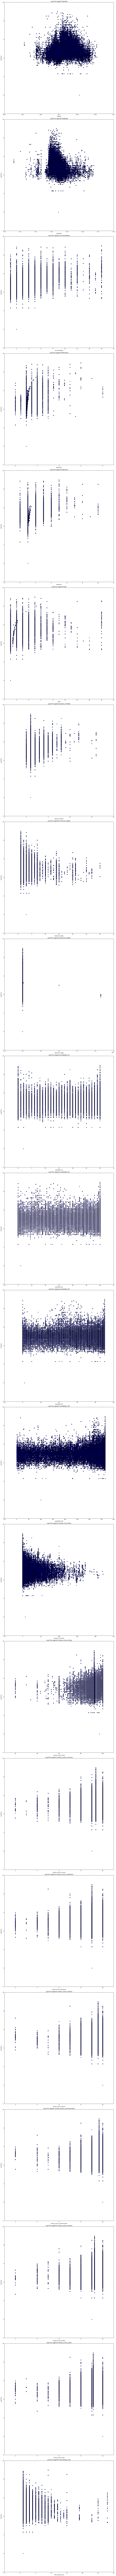

In [10]:
# visualize continuous random variables against response variable
# to determine if any transformations of the predictors would be helpful
cts_vars_to_plot = ['latitude', 'longitude',
                    'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                    'guests_included', 'minimum_nights', 'maximum_nights',
                    'availability_30', 'availability_60', 'availability_90', 'availability_365',
                    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'host_listing_count']

fig, ax = plt.subplots(len(cts_vars_to_plot), figsize=(15, 15*len(cts_vars_to_plot)))
for i, var in enumerate(cts_vars_to_plot):
    ax[i].scatter(calendar_expanded_df[var], calendar_expanded_df['price_log_calendar'])
    ax[i].set_title('Log Price against ' + var)
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Log Price')

plt.tight_layout()
plt.show()

In [11]:
# transform variables determined to have nonlinear relationship with log price
calendar_expanded_df['longitude_sq'] = pd.to_numeric(calendar_expanded_df['longitude'], errors='raise')**2
calendar_expanded_df['review_scores_value_sq'] = calendar_expanded_df['review_scores_value']**2
calendar_expanded_df['host_listing_count_sq'] = calendar_expanded_df['host_listing_count']**2
calendar_expanded_df['longitude'] = pd.to_numeric(calendar_expanded_df['longitude'], errors='raise')

In [12]:
# create reasonable interaction terms
# time interacts with capacity of listing
calendar_expanded_df['weekend_x_bedrooms'] = calendar_expanded_df['weekend'] * calendar_expanded_df['bedrooms']
calendar_expanded_df['weekend_x_accommodates'] = calendar_expanded_df['weekend'] * calendar_expanded_df['accommodates']
calendar_expanded_df['holiday_x_bedrooms'] = calendar_expanded_df['holiday'] * calendar_expanded_df['bedrooms']
calendar_expanded_df['holiday_x_accommodates'] = calendar_expanded_df['holiday'] * calendar_expanded_df['accommodates']

In [13]:
# extract relevant feature listing
cts_vars = ['latitude', 'longitude', 
            'accommodates', 'bathrooms', 'bedrooms', 'beds', 
            'guests_included', 'minimum_nights', 'maximum_nights',
            'availability_30', 'availability_60', 'availability_90', 'availability_365',
            'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
            'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'host_listing_count', 'weekend_x_bedrooms',
            'weekend_x_accommodates', 'holiday_x_bedrooms', 'holiday_x_accommodates',
            'longitude_sq', 'review_scores_value_sq', 'host_listing_count_sq']

categorical_vars = ['zipcode_q1', 'zipcode_q2', 'zipcode_q3', 'zipcode_q4',
                   'neighborhood_q1', 'neighborhood_q2', 'neighborhood_q3', 'neighborhood_q4',
                   'weekend', 'holiday', 'slump', 'jan', 'feb', 'march'] + \
                    property_type_cols + is_location_exact_cols + room_type_cols + bed_type_cols

print 'continuous variables: ', cts_vars
print 'categorical variables:, ', categorical_vars

# grab X and y
all_predictors = cts_vars + categorical_vars
X_df = calendar_expanded_df[all_predictors].copy()
y_df = calendar_expanded_df[['price_log_calendar']].copy()

continuous variables:  ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_listing_count', 'weekend_x_bedrooms', 'weekend_x_accommodates', 'holiday_x_bedrooms', 'holiday_x_accommodates', 'longitude_sq', 'review_scores_value_sq', 'host_listing_count_sq']
categorical variables:,  ['zipcode_q1', 'zipcode_q2', 'zipcode_q3', 'zipcode_q4', 'neighborhood_q1', 'neighborhood_q2', 'neighborhood_q3', 'neighborhood_q4', 'weekend', 'holiday', 'slump', 'jan', 'feb', 'march', 'Apartment', 'Bed & Breakfast', 'Boat', 'Cabin', 'Camper/RV', 'Castle', 'Cave', 'Chalet', 'Dorm', 'Earth House', 'House', 'Hut', 'Lighthouse', 'Loft', 'Other', 'Tent', 

In [14]:
# numpy for sklearn
X = X_df.as_matrix()
y = y_df.as_matrix()

# Split into training and testing
Xy = np.concatenate((X, y), axis=1)
Xy = Xy[~np.isnan(Xy).any(axis=1)]

# use 75% for training, the rest for testing
num_train = int(np.round(Xy.shape[0]*0.75))

# shuffle for random selection
random.shuffle(Xy)

# pull out sets
X_train = Xy[:num_train,:(-1)]
X_test = Xy[num_train:,:(-1)]
y_train = Xy[:num_train, -1]
y_test = Xy[num_train:, -1]

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)

In [15]:
# fit simple linear regression
linear_model = LinReg()
linear_model.fit(X_train, y_train)
print 'R^2 in test: ', linear_model.score(X_test, y_test)

R^2 in test:  0.628736337716


In [36]:
Xy.shape

(7200423, 72)

Conclusions:
- when training we need to use a subset of our 7M observations for because using all the data takes too long
- Ridge/Lasso regressions didn't improve much over baseline linear regression
- random forest regression worked best

In [40]:
# sample a subset of data to train and cross-validate
# since 7M observations and 72 predictors takes 4+ hours to run for each time
n_samp = 1000000
sample_index = random.sample(range(0, Xy.shape[0]), n_samp)
df_x = Xy[sample_index, :-1]
df_y = Xy[sample_index, -1]

# standardize predictors for ridge regression
df_x = preprocessing.scale(df_x)


/Applications/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [41]:
# Generic function for cross-validation 
def AutoKFold(train_x, train_y, params1, params2, title):
    #Create a k-folds validation object
    kf = KFold(len(train_x), n_folds=5)
    #Record the mean score for each depth
    score_test = []
    score_train = []
    n = len(train_y)
    #print params1
    #Iterate over the parameters
    for param1 in params1:    
        for param2 in params2:
            #Record the score for each fold
            valid_score_test = []
            valid_score_train = []
            print param1
            #Iterate over the folds
            for train_index, test_index in kf:
                #Split x_train into a train and "test" set
                x_validate_train, x_validate_test = train_x[train_index], train_x[test_index]
                y_validate_train, y_validate_test = train_y[train_index], train_y[test_index]

                if title == 'Ridge': 
                    model = Ridge_Reg(alpha=param1)
                elif title == 'Lasso':
                    model = Lasso_Reg(alpha=param1)

                model.fit(x_validate_train, y_validate_train)
                
                #Compute the scores
                valid_score_test.append(model.score(x_validate_test, y_validate_test))
                valid_score_train.append(model.score(x_validate_train, y_validate_train))
            #Append the mean scores over the k-folds to score list
            score_test.append(np.mean(valid_score_test))
            score_train.append(np.mean(valid_score_train))
            
    return(np.concatenate((score_test, score_train)))

1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
[ 0.63696548  0.63696548  0.63696548  0.63696548  0.63696531  0.63694991
  0.63634176  0.63413692  0.63337109  0.63327779  0.63326331  0.6330411
  0.62892823  0.55305145  0.21002731  0.63703232  0.63703232  0.63703232
  0.63703232  0.63703214  0.6370166   0.63640801  0.63420308  0.63343726
  0.63334393  0.63332918  0.63310496  0.62898236  0.55308666  0.2100468 ]
(15,)


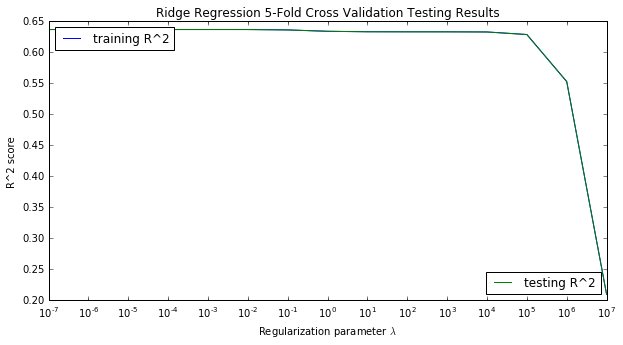

In [42]:
# tuning parameters for Ridge and LASSO regressions
lambda_lst = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
num_lambdas = len(lambda_lst)
num_predictors = Xy.shape[1]

# Ridge Regression
scores = AutoKFold(df_x, df_y, lambda_lst, [0], 'Ridge')

print scores
scores_test = scores[:num_lambdas]
scores_train = scores[num_lambdas:]
print scores_test.shape

ax = plt.figure(figsize=(10,5))
#h=plt.semilogx(10**np.array(lambda_lst), coeff_a);
h1=plt.semilogx(np.array(lambda_lst), scores_train);
h2=plt.semilogx(np.array(lambda_lst), scores_test);
plt.title('Ridge Regression 5-Fold Cross Validation Testing Results')
plt.ylabel("R^2 score")
plt.xlabel(r'Regularization parameter $\lambda$')
first_legend=plt.legend(h1, ['training R^2'], loc=2)
ax1 = plt.gca().add_artist(first_legend)
plt.legend(h2, ['testing R^2'], loc=4)
plt.show()

1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
100000.0
1000000.0
10000000.0
[  6.33257262e-01   6.33257481e-01   6.33258742e-01   6.33253895e-01
   6.32896879e-01   6.23935551e-01   4.92698284e-01  -1.00327043e-05
  -1.00327043e-05  -1.00327043e-05  -1.00327043e-05  -1.00327043e-05
  -1.00327043e-05  -1.00327043e-05  -1.00327043e-05   6.33323440e-01
   6.33323636e-01   6.33324665e-01   6.33317973e-01   6.32957893e-01
   6.23992652e-01   4.92711729e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
(15,)


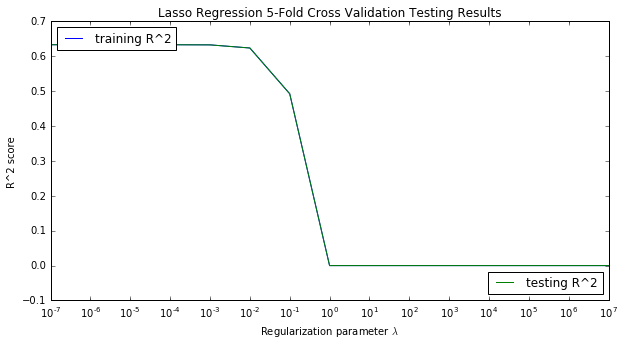

In [43]:
# Lasso Regression
scores = AutoKFold(df_x, df_y, lambda_lst, [0], 'Lasso')

print scores
scores_test = scores[:num_lambdas]
scores_train = scores[num_lambdas:]
print scores_test.shape

ax = plt.figure(figsize=(10,5))
h1=plt.semilogx(np.array(lambda_lst), scores_train);
h2=plt.semilogx(np.array(lambda_lst), scores_test);
plt.title('Lasso Regression 5-Fold Cross Validation Testing Results')
plt.ylabel("R^2 score")
plt.xlabel(r'Regularization parameter $\lambda$')
first_legend=plt.legend(h1, ['training R^2'], loc=2)
ax1 = plt.gca().add_artist(first_legend)
plt.legend(h2, ['testing R^2'], loc=4)
plt.show()

In [ ]:
# generic function to plot scores
def plot_CV_scores(score_train, score_test, index, index_label, title):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    ax.scatter(index, score_train, color='red', label='score_train')
    ax.plot(index, score_train, color='red')

    ax.scatter(index, score_test, color='blue', label='score_test')
    ax.plot(index, score_test, color='blue')

    ax.set_xlabel(index_label)
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend()

In [97]:
# Generic function for cross-validation 
def AutoKFold_RF(train_x, train_y, params1, params2, params3):
    #Create a k-folds validation object
    kf = KFold(len(train_x), n_folds=5)
    #Record the mean score for each depth
    score_test = []
    score_train = []
    n = len(train_y)
    #print params1
    #Iterate over the parameters
    for param1 in params1:    
        for param2 in params2:
            for param3 in params3:
                #Record the score for each fold
                valid_score_test = []
                valid_score_train = []
                #print param1
                #Iterate over the folds
                for train_index, test_index in kf:
                    #Split x_train into a train and "test" set
                    x_validate_train, x_validate_test = train_x[train_index], train_x[test_index]
                    y_validate_train, y_validate_test = train_y[train_index], train_y[test_index]

                    model = RandomForest(n_estimators=param1, max_depth=param2, max_features=param3)

                    model.fit(x_validate_train, y_validate_train)

                    #Compute the scores
                    valid_score_test.append(model.score(x_validate_test, y_validate_test))
                    valid_score_train.append(model.score(x_validate_train, y_validate_train))
                #Append the mean scores over the k-folds to score list
                score_test.append(np.mean(valid_score_test))
                score_train.append(np.mean(valid_score_train))

                print ("Trees:", param1, "Max_depth:", param2, "Max_features:", param3,
                       "Testing score:", round(np.mean(valid_score_test), 2), 
                       "Training score:", round(np.mean(valid_score_train), 2))

    return(np.concatenate((score_test, score_train)))

In [98]:
# sample a subset of data to train and cross-validate
# since 7M observations and 72 predictors takes 4+ hours to run for each time
n_samp = 10000
sample_index = random.sample(range(0, Xy.shape[0]), n_samp)
df_x = Xy[sample_index, :-1]
df_y = Xy[sample_index, -1]

# standardize predictors for ridge regression
df_x = preprocessing.scale(df_x)

In [99]:
# Random forest regression with 10,000 observations
n_trees = np.arange(10, 80, 30)  
depths = np.arange(2, 10)
features = np.arange(5, 70, 20)
n_combos = len(n_trees)*len(depths)*len(features)
print 'Number of combos: ', n_combos
scores = AutoKFold_RF(df_x, df_y, n_trees, depths, features)
scores_test = scores[:n_combos]
scores_train = scores[n_combos:]

Number of combos:  96
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 5, 'Testing score:', 0.34, 'Training score:', 0.34)
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 25, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 45, 'Testing score:', 0.5, 'Training score:', 0.51)
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 65, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 5, 'Testing score:', 0.41, 'Training score:', 0.42)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 25, 'Testing score:', 0.57, 'Training score:', 0.58)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 45, 'Testing score:', 0.58, 'Training score:', 0.59)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 65, 'Testing score:', 0.57, 'Training score:', 0.58)
('Trees:', 10, 'Max_depth:', 4, 'Max_features:', 5, 'Testing score:', 0.5, 'Training score:', 0.5)
('Trees:', 10, 'Max_depth:', 4, 'Max_features:', 25, 'Testing scor

96
96


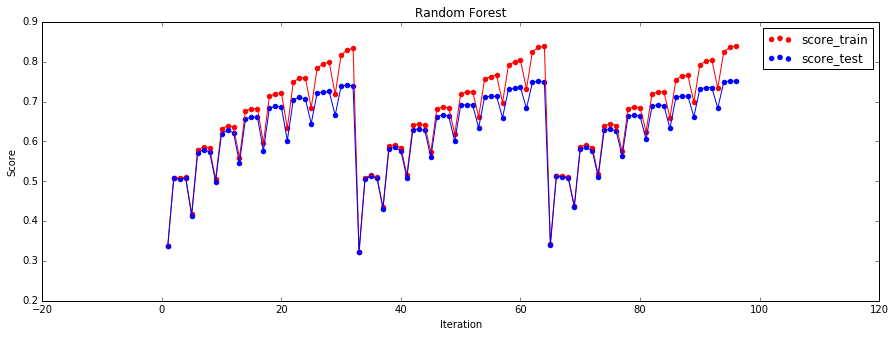

In [100]:
plot_CV_scores(scores_train, scores_test, range(1, n_combos+1), 'Iteration', 'Random Forest')

In [103]:
max(scores_test)

0.79880959806639906

In [101]:
# sample a subset of data to train and cross-validate
# since 7M observations and 72 predictors takes 4+ hours to run for each time
n_samp = 100000
sample_index = random.sample(range(0, Xy.shape[0]), n_samp)
df_x = Xy[sample_index, :-1]
df_y = Xy[sample_index, -1]

# standardize predictors for ridge regression
df_x = preprocessing.scale(df_x)


Number of combos:  64
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 5, 'Testing score:', 0.37, 'Training score:', 0.37)
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 25, 'Testing score:', 0.5, 'Training score:', 0.5)
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 45, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 10, 'Max_depth:', 2, 'Max_features:', 65, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 5, 'Testing score:', 0.43, 'Training score:', 0.43)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 25, 'Testing score:', 0.58, 'Training score:', 0.58)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 45, 'Testing score:', 0.58, 'Training score:', 0.58)
('Trees:', 10, 'Max_depth:', 3, 'Max_features:', 65, 'Testing score:', 0.58, 'Training score:', 0.58)
('Trees:', 10, 'Max_depth:', 4, 'Max_features:', 5, 'Testing score:', 0.47, 'Training score:', 0.47)
('Trees:', 10, 'Max_depth:', 4, 'Max_features:', 25, 'Testing sco

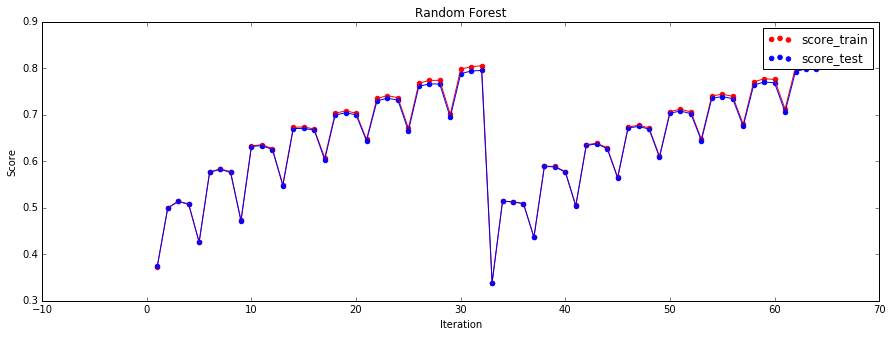

In [105]:
# Random forest regression with 100,000 observations
n_trees = np.arange(10, 50, 30)  
depths = np.arange(2, 10)
features = np.arange(5, 70, 20)
n_combos = len(n_trees)*len(depths)*len(features)
print 'Number of combos: ', n_combos
scores = AutoKFold_RF(df_x, df_y, n_trees, depths, features)
scores_test = scores[:n_combos]
scores_train = scores[n_combos:]

# plot scores
plot_CV_scores(scores_train, scores_test, range(1, n_combos+1), 'Iteration', 'Random Forest')

In [106]:
max(scores_test)

0.79881433296205073

Here we can see the the number of trees doesn't significantly change the testing score based on the step-wise nature of the testing scores. It is max_depth and max_features that drive increased test scores so we tune exclusively for those and set trees=40. We tune on 100,000 observations for run-time reasons.

Note: in lecture 16 it's recommended that for random forest max_features to be p/3 where p is the number of predictors. Also, random forests cannot overfit the data with respect to the number of trees, so we should first select the best max_depth and max_features for some "big enough" value for num_trees, and then re-tune with fixed max_depth and max_features while varying num_trees in order to find the minimum value for num_trees that gives us our best testing scores.

Number of combos:  133
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 5, 'Testing score:', 0.33, 'Training score:', 0.33)
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 15, 'Testing score:', 0.49, 'Training score:', 0.49)
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 25, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 35, 'Testing score:', 0.52, 'Training score:', 0.52)
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 45, 'Testing score:', 0.52, 'Training score:', 0.52)
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 55, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 40, 'Max_depth:', 2, 'Max_features:', 65, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 40, 'Max_depth:', 4, 'Max_features:', 5, 'Testing score:', 0.51, 'Training score:', 0.51)
('Trees:', 40, 'Max_depth:', 4, 'Max_features:', 15, 'Testing score:', 0.62, 'Training score:', 0.62)
('Trees:', 40, 'Max_depth:', 4, 'Max_features:', 25, 'Testing

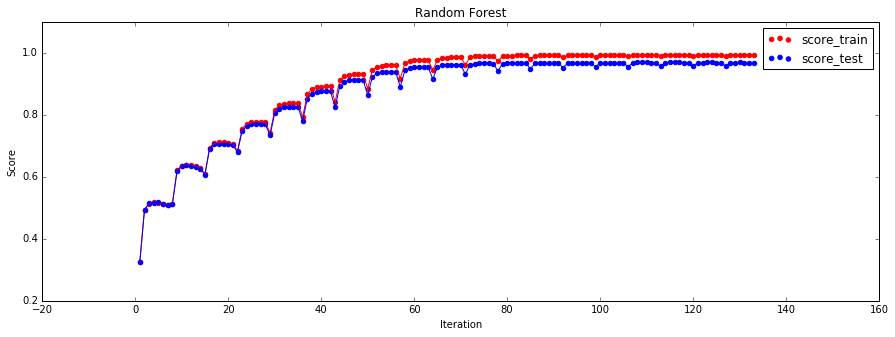

In [107]:
# Random forest regression with 100,000 observations tuning max_depth and max_features
n_trees = np.array([40])  
depths = np.arange(2, 40, 2)
features = np.arange(5, 70, 10)
n_combos = len(n_trees)*len(depths)*len(features)
print 'Number of combos: ', n_combos
scores = AutoKFold_RF(df_x, df_y, n_trees, depths, features)
scores_test = scores[:n_combos]
scores_train = scores[n_combos:]

# plot scores
plot_CV_scores(scores_train, scores_test, range(1, n_combos+1), 'Iteration', 'Random Forest')

Select max_depth=14 and max_features=25 for test score of 0.91. There were higher test scores up to 0.97 but those were for higher max_depth so I tried to pick lower values to avoid issues of over-fitting to our subsample


Number of combos:  10
('Trees:', 10, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.9, 'Training score:', 0.92)
('Trees:', 20, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.92)
('Trees:', 30, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.92)
('Trees:', 40, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.92)
('Trees:', 50, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.92)
('Trees:', 60, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.93)
('Trees:', 70, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.93)
('Trees:', 80, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.93)
('Trees:', 90, 'Max_depth:', 14, 'Max_features:', 25, 'Testing score:', 0.91, 'Training score:', 0.93)
('Trees:', 100, 'Max_depth:', 14, 'Max_features:', 2

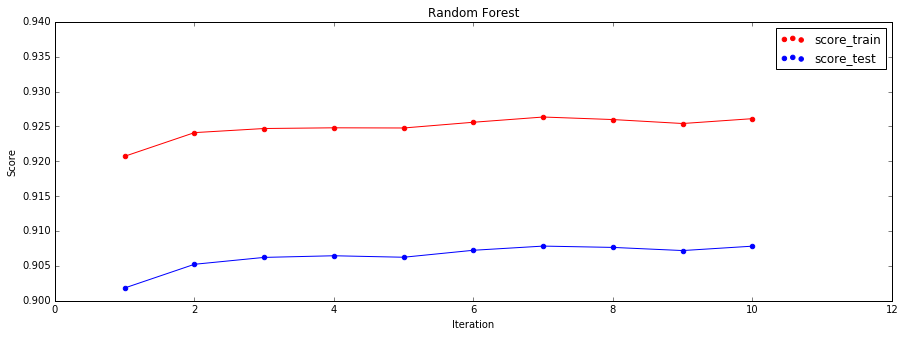

In [108]:
# Random forest regression with 100,000 observations tuning max_depth and max_features
n_trees = np.arange(10, 110, 10)
depths = np.array([14])
features = np.array([25])
n_combos = len(n_trees)*len(depths)*len(features)
print 'Number of combos: ', n_combos
scores = AutoKFold_RF(df_x, df_y, n_trees, depths, features)
scores_test = scores[:n_combos]
scores_train = scores[n_combos:]

# plot scores
plot_CV_scores(scores_train, scores_test, range(1, n_combos+1), 'Iteration', 'Random Forest')

Select num_trees=100, max_depth=14, and max_features=25 for test score of 0.91. We want to have the fewest number of trees possible while maintaining model score to decrease training time. However, in order to get an accurate prediction interval with our quantile regression forests method, we need to use more trees (200) as explained by: http://blog.datadive.net/prediction-intervals-for-random-forests/

In [60]:
# build final random forest regression model

# sample a subset of data to train and cross-validate
# since 7M observations and 72 predictors takes 4+ hours to run for each time
n_samp = 1000000
sample_index = random.sample(range(0, Xy.shape[0]), n_samp)
df_x = Xy[sample_index, :-1]
df_y = Xy[sample_index, -1]

# standardize predictors for ridge regression
df_x = preprocessing.scale(df_x)

# use 75% for training, the rest for testing
num_train = int(np.round(df_x.shape[0]*0.75))

# pull out sets
X_train = df_x[:num_train,:]
X_test = df_x[num_train:,:]
y_train = df_y[:num_train]
y_test = df_y[num_train:]

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)

rf = RandomForest(n_estimators=1000, max_depth=14, max_features=25)
rf.fit(X_train, y_train)
print 'Score', round(rf.score(X_test, y_test), 2)

Score 0.92


In [63]:
# Use quantile regression forests to build 90% prediction interval
def pred_ints(model, X, percentile=95):
    err_down = []
    err_up = []
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x].reshape(1, -1))[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))
    return err_down, err_up

In [64]:
# get predictions and 90% prediction interval
preds = rf.predict(X_test)
print preds
err_down, err_up = pred_ints(rf, X_test, percentile=90)

[ 4.2544405   5.15956824  4.7523481  ...,  4.3820096   5.11106386
  3.96469393]


In [65]:
# check how many of prediction intervals contained true value
truth = y_test
correct = 0.
for i, val in enumerate(truth):
    if err_down[i] <= val <= err_up[i]:
        correct += 1
print correct/len(truth)

0.830168


In [66]:
err_down[0:5]

[4.1271253250468494,
 4.9669589293328089,
 4.4037264621856762,
 4.8675344504555822,
 3.931255175817538]

In [67]:
preds[0:5]

array([ 4.2544405 ,  5.15956824,  4.7523481 ,  5.1672755 ,  4.25136859])

In [68]:
err_up[0:5]

[4.3929975209413312,
 5.3315331566423447,
 5.0178885294188795,
 5.401747432886876,
 4.7449321283632493]

Prediction interval contained the true y_test value ~80-90% of the time